<a href="https://colab.research.google.com/github/kvame96/NOVIA/blob/main/%22Machine%20Learning%20Methods%22_Assignment_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESSION

# Loading

In [1]:
# Loading
%%capture

from google.colab import drive
drive.mount('/content/drive')
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

google_drive_root = '/content/drive/MyDrive'
assignment_loc = '/Novia//Machine Learning Methods/'
os.chdir(google_drive_root + assignment_loc)
csv_file_name = 'winequality-red.csv'
data = pd.read_csv(csv_file_name)

# To Reset the Parameters


In [40]:
# reset & Loading (to be sure that we don't re-use or overwrite previous data)
%%capture
%reset -f

from google.colab import drive
drive.mount('/content/drive')
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

google_drive_root = '/content/drive/MyDrive'
assignment_loc = '/Novia//Machine Learning Methods/'
os.chdir(google_drive_root + assignment_loc)
csv_file_name = 'winequality-red.csv'
data = pd.read_csv(csv_file_name)

################################################################################

# Standardization

from sklearn.preprocessing import StandardScaler

# Select numerical features for standardization, excluding 'quality' and 'alcohol'
numerical_features = data.select_dtypes(include=np.number).columns.drop(['quality', 'alcohol'])

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features and transform the data
data[numerical_features] = scaler.fit_transform(data[numerical_features])

################################################################################

# Split the normalized data into training and test set

from sklearn.model_selection import train_test_split

X = data.drop(['alcohol', 'quality'], axis=1)
y = data['alcohol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

################################################################################

# REGRESSION MODELS

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_test, y_pred, model_name):
    print(f"\n--- Evaluation for {model_name} ---")

    # Calculate and display regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

    # Prediction vs. Actual plot and Residual plot side-by-side
    fig, axes = plt.subplots(2, 1, figsize=(14, 14))

    # Prediction vs. Actual plot
    axes[0].scatter(y_test, y_pred, alpha=0.5)
    axes[0].set_xlabel("Actual Alcohol")
    axes[0].set_ylabel("Predicted Alcohol")
    axes[0].set_title("Actual vs. Predicted Wine Alcohol")
    axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    axes[0].grid(True)

    # Residual plot
    residuals = y_test - y_pred
    axes[1].scatter(y_pred, residuals, alpha=0.5)
    axes[1].set_xlabel("Predicted Alcohol")
    axes[1].set_ylabel("Residuals")
    axes[1].set_title("Residual Plot")
    axes[1].axhline(y=0, color='r', linestyle='--')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# kNN

In [3]:
from sklearn.neighbors import KNeighborsRegressor

mae_list = []
mse_list = []
rmse_list = []
r2_list = []
neighbors_range = range(1, 100)

for n_neighbors in neighbors_range:
    # Initialize KNeighborsRegressor
    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)

    # Train the model
    knn_regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = knn_regressor.predict(X_test)

    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the metrics
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

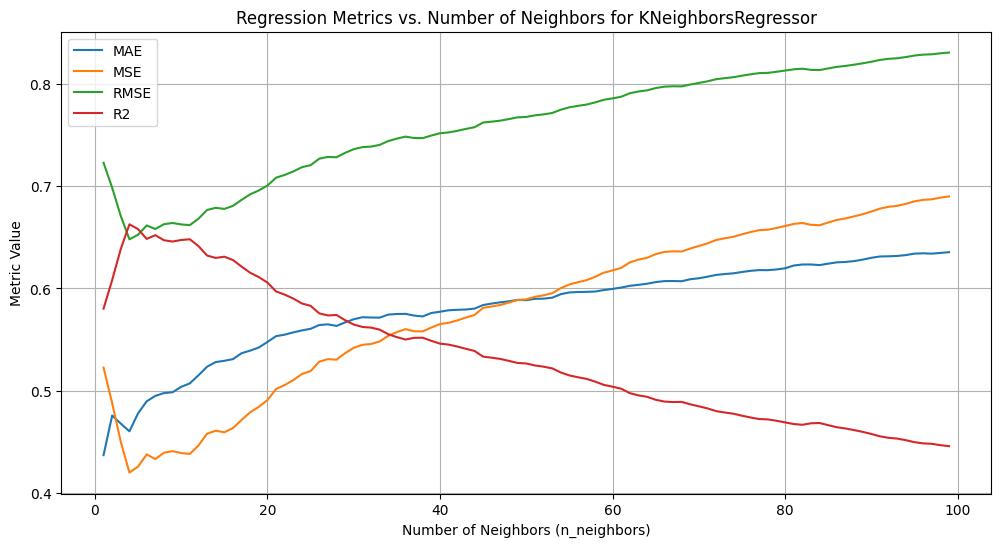

In [4]:
# Plotting the metrics
plt.figure(figsize=(12, 6))

plt.plot(neighbors_range, mae_list, label='MAE')
plt.plot(neighbors_range, mse_list, label='MSE')
plt.plot(neighbors_range, rmse_list, label='RMSE')
plt.plot(neighbors_range, r2_list, label='R2')

plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Metric Value")
plt.title("Regression Metrics vs. Number of Neighbors for KNeighborsRegressor")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Find the index of the minimum RMSE adn maximum R2
best_r2_index = r2_list.index(max(r2_list))
min_rmse_index = rmse_list.index(min(rmse_list))

# Get the corresponding number of neighbors
best_n_neighbors_r2 = neighbors_range[best_r2_index]
best_n_neighbors_rmse = neighbors_range[min_rmse_index]

# Get the min RMSE and max R2
best_r2_value = r2_list[best_r2_index]
min_rmse_value = rmse_list[min_rmse_index]

# Print the results
print(f"The maximum R2 value of {best_r2_value:.4f} was achieved with n_neighbors = {best_n_neighbors_r2}")
print(f"The minimum RMSE value of {min_rmse_value:.4f} was achieved with n_neighbors = {best_n_neighbors_rmse}")

The maximum R2 value of 0.6627 was achieved with n_neighbors = 4
The minimum RMSE value of 0.6480 was achieved with n_neighbors = 4



--- Evaluation for KNeighborsRegressor ---
Mean Absolute Error (MAE): 0.4602
Mean Squared Error (MSE): 0.4199
Root Mean Squared Error (RMSE): 0.6480
R-squared (R2): 0.6627


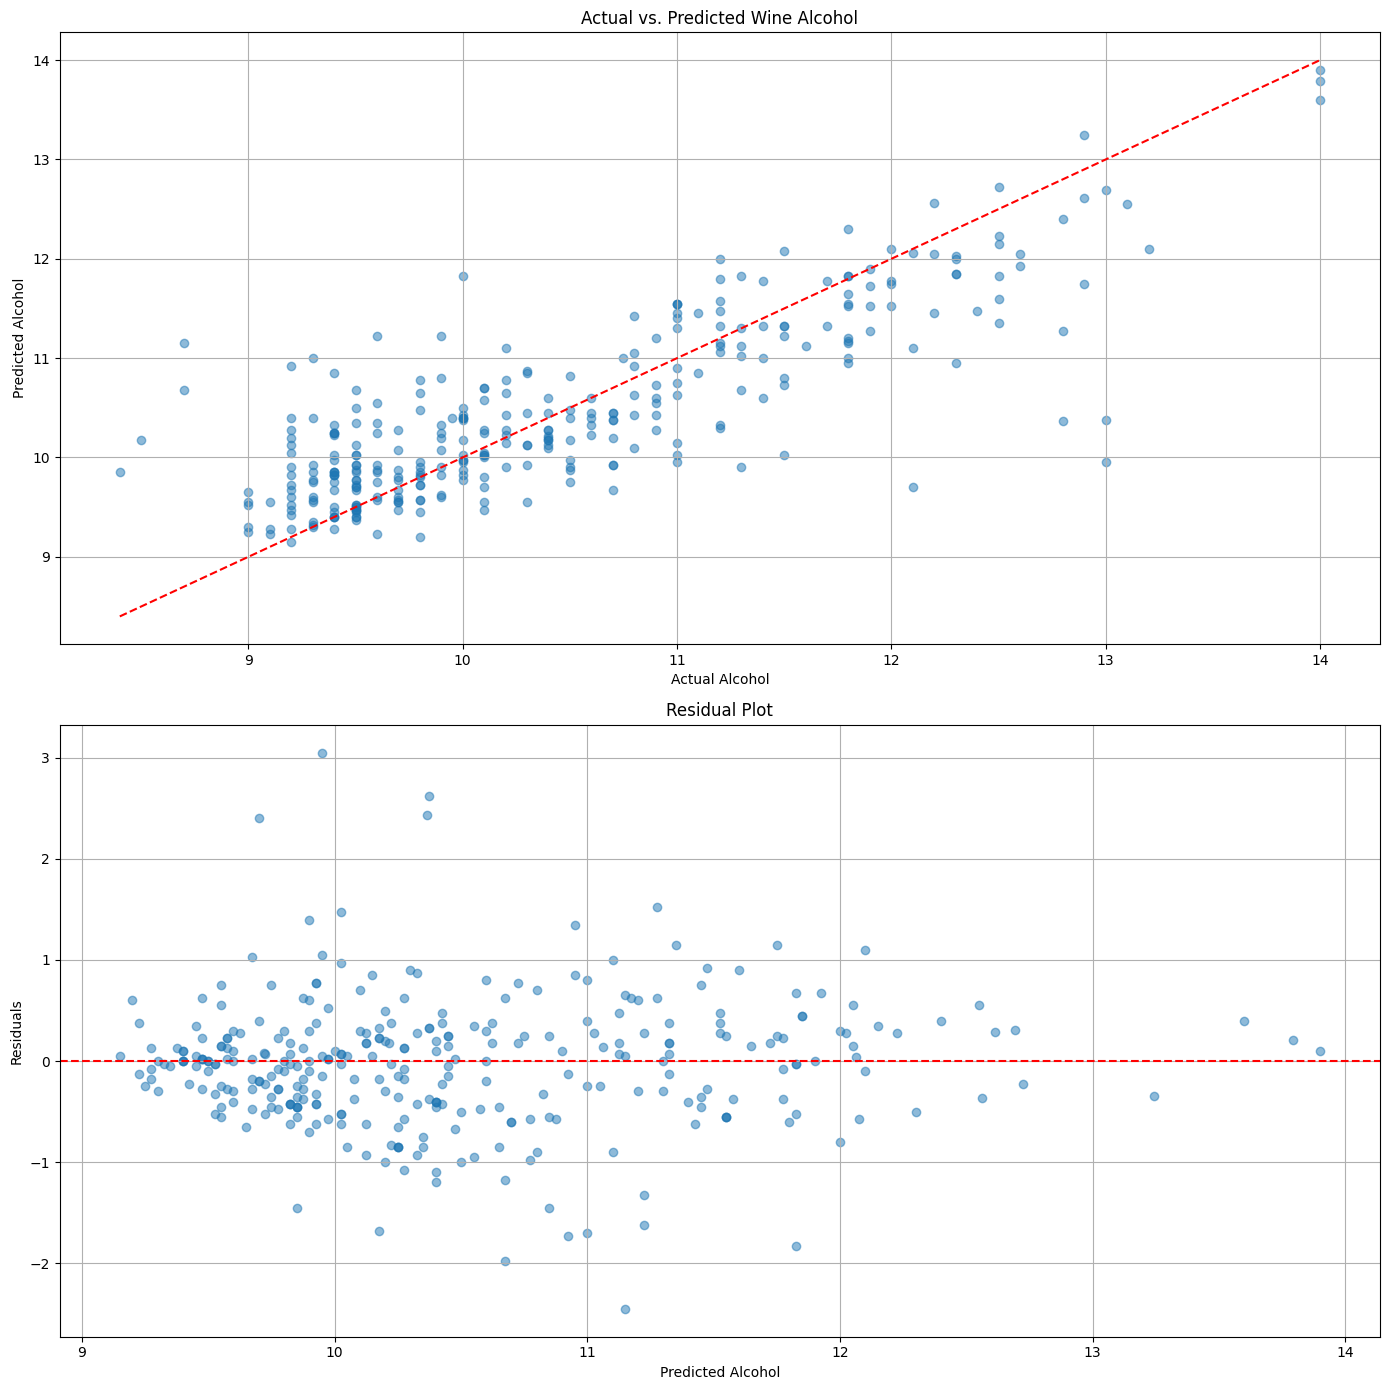

In [6]:
from sklearn.neighbors import KNeighborsRegressor

#Initialize KNeighborsRegressor
#You can adjust n_neighbors, for example:
knn_regressor = KNeighborsRegressor(n_neighbors=4)

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
evaluate_model(y_test, y_pred, "KNeighborsRegressor")

# Random Forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

mae_list = []
mse_list = []
rmse_list = []
r2_list = []
estimators_range = range(1, 61)

for n_estimators in estimators_range:
    # Initialize RandomForestRegressor
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Train the model
    rf_regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_regressor.predict(X_test)

    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the metrics
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

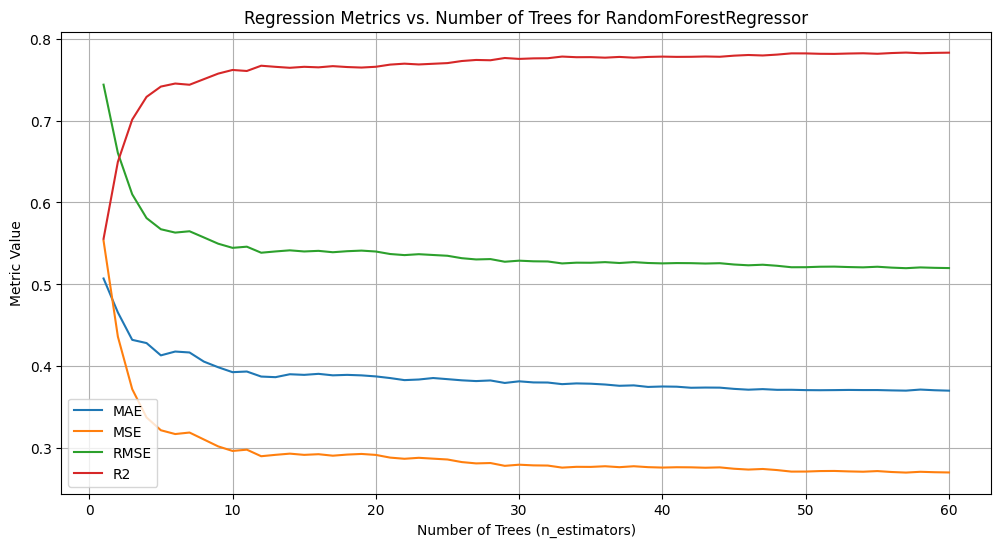

In [8]:
# Plotting the metrics
plt.figure(figsize=(12, 6))

plt.plot(estimators_range, mae_list, label='MAE')
plt.plot(estimators_range, mse_list, label='MSE')
plt.plot(estimators_range, rmse_list, label='RMSE')
plt.plot(estimators_range, r2_list, label='R2')

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Metric Value")
plt.title("Regression Metrics vs. Number of Trees for RandomForestRegressor")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Find the index of the minimum RMSE and maximum R2
best_r2_index = r2_list.index(max(r2_list))
min_rmse_index = rmse_list.index(min(rmse_list))

# Get the corresponding number of estimators
best_n_estimators_r2 = estimators_range[best_r2_index]
best_n_estimators_rmse = estimators_range[min_rmse_index]

# Get the min RMSE and max R2
best_r2_value = r2_list[best_r2_index]
min_rmse_value = rmse_list[min_rmse_index]

# Print the results
print(f"The maximum R2 value of {best_r2_value:.4f} was achieved with n_estimators = {best_n_estimators_r2}")
print(f"The minimum RMSE value of {min_rmse_value:.4f} was achieved with n_estimators = {best_n_estimators_rmse}")

The maximum R2 value of 0.7830 was achieved with n_estimators = 57
The minimum RMSE value of 0.5197 was achieved with n_estimators = 57



--- Evaluation for RandomForestRegressor ---
Mean Absolute Error (MAE): 0.3702
Mean Squared Error (MSE): 0.2701
Root Mean Squared Error (RMSE): 0.5197
R-squared (R2): 0.7830


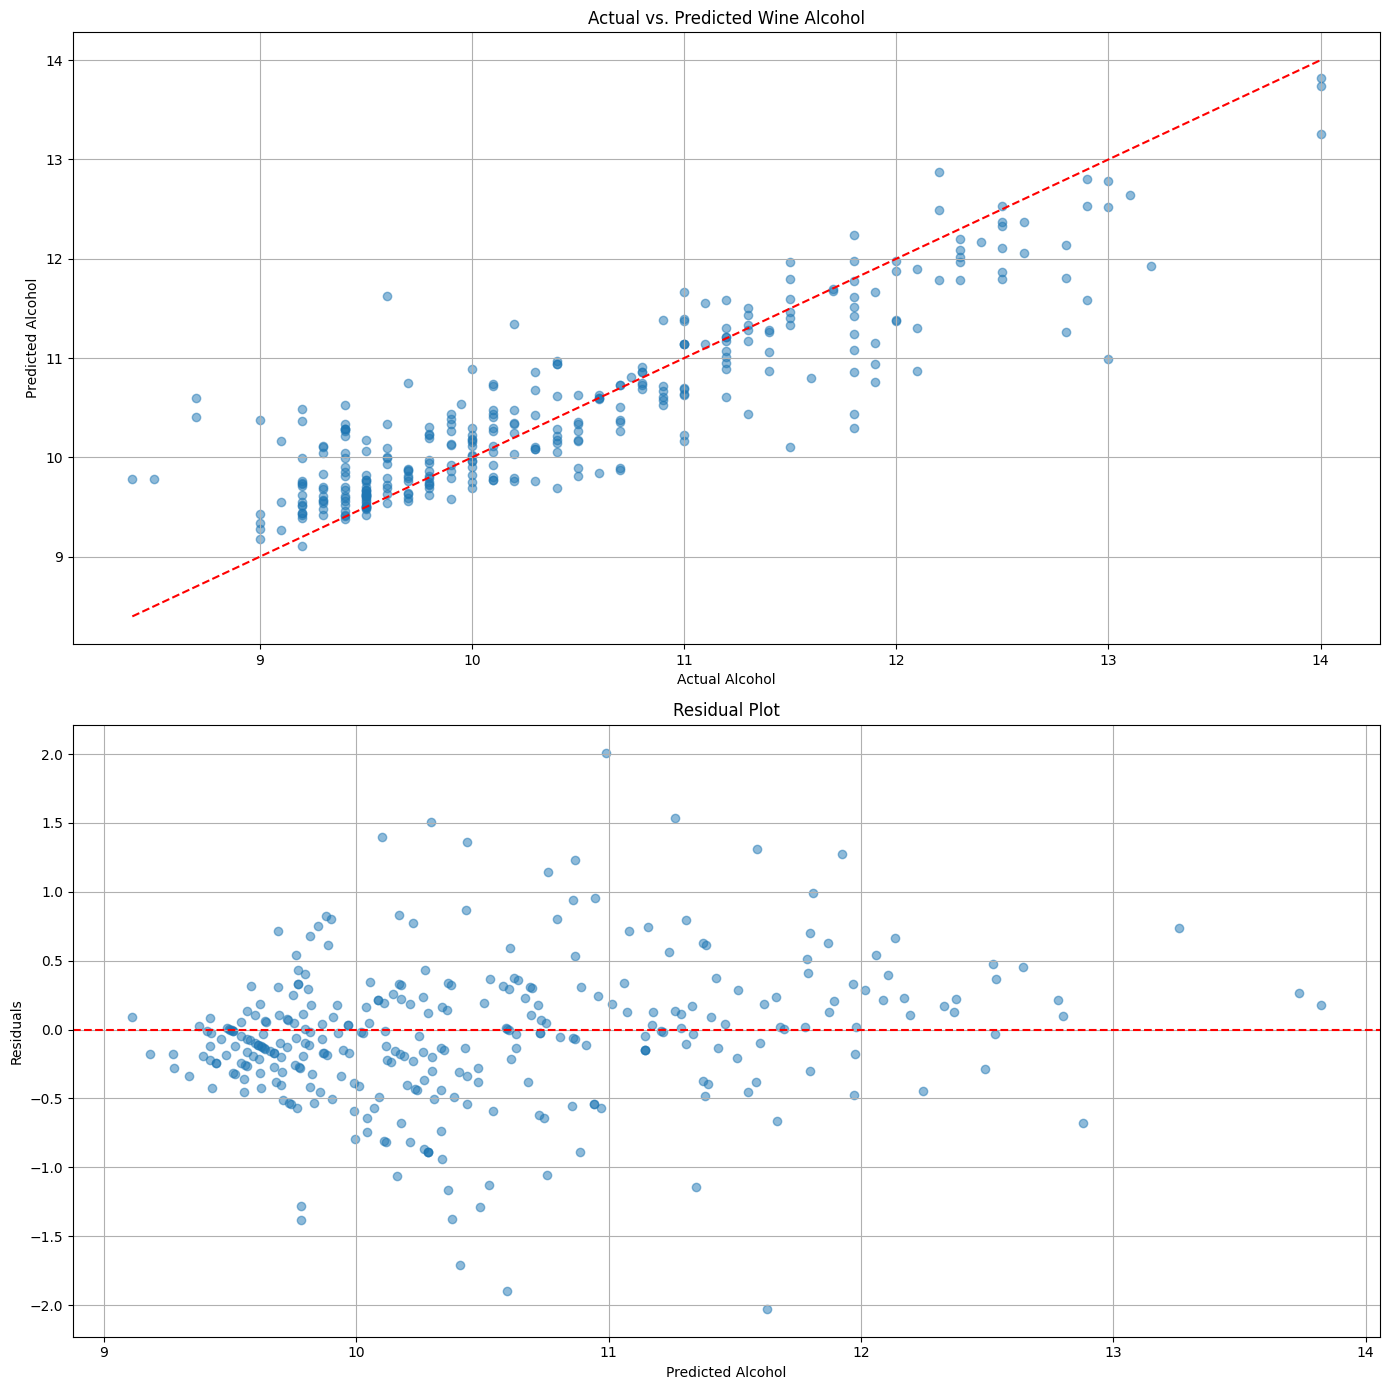

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForestRegressor with the best number of trees
rf_regressor = RandomForestRegressor(n_estimators=best_n_estimators_r2, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
evaluate_model(y_test, y_pred, "RandomForestRegressor")

Feature Importances:
density                 0.441001
residual sugar          0.127874
citric acid             0.081195
fixed acidity           0.070510
sulphates               0.062405
pH                      0.053803
total sulfur dioxide    0.052709
volatile acidity        0.048046
chlorides               0.035566
free sulfur dioxide     0.026891
dtype: float64


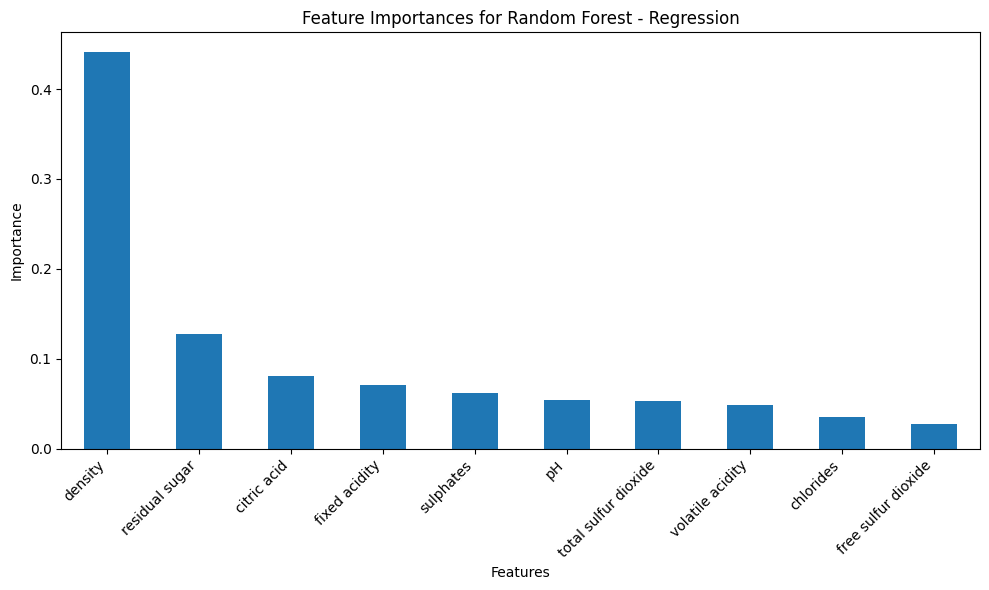

In [11]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a pandas Series for better visualization
importances = pd.Series(feature_importances, index=feature_names)

# Sort the importances in descending order
sorted_importances = importances.sort_values(ascending=False)

# Print the feature importances
print("Feature Importances:")
print(sorted_importances)

# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title("Feature Importances for Random Forest - Regression")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# MLP

In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Define the range of hidden layer sizes
layer_sizes_1 = range(1, 101, 1)
layer_sizes_2 = range(1, 101, 1)

In [ ]:
"""
%%capture

################################################################################

# DO NOT EXECUTE !!!

################################################################################

# Lists to store results
r2_scores = []
rmse_scores= []
sizes_1 = []
sizes_2 = []

print("Training MLPRegressor models for different hidden layer sizes...")
for size1 in layer_sizes_1:
    for size2 in layer_sizes_2:
        mlp = MLPRegressor(
            hidden_layer_sizes=(size1, size2),
            activation='relu',
            solver='adam',  # As you used in your main model
            max_iter=200,
            random_state=42
        )
        try:
            mlp.fit(X_train, y_train)
            y_pred = mlp.predict(X_test)
            r2 = r2_score(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            r2_scores.append(r2)
            rmse_scores.append(rmse)
        except Exception as e:
            print(f"Error training MLPRegressor with sizes ({size1}, {size2}): {e}")
            r2_scores.append(np.nan)
            rmse_scores.append(np.nan)
        sizes_1.append(size1)
        sizes_2.append(size2)

print("Training complete.")
"""

In [ ]:
"""
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Define the range of hidden layer sizes
layer_sizes_1 = range(1, 101, 1)
layer_sizes_2 = range(1, 101, 1)
"""

In [ ]:
%%capture

################################################################################

# DO NOT EXECUTE !!!

################################################################################

# Lists to store results
r2_scores = []
rmse_scores = []
sizes_1 = []
sizes_2 = []

print("Training MLPRegressor models for different hidden layer sizes...")
for size1 in layer_sizes_1:
    for size2 in layer_sizes_2:
        mlp = MLPRegressor(
            hidden_layer_sizes=(size1, size2),
            activation='relu',
            solver='adam',
            max_iter=200,
            random_state=42
        )
        try:
            mlp.fit(X_train, y_train)
            y_pred = mlp.predict(X_test)
            r2 = r2_score(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            r2_scores.append(r2)
            rmse_scores.append(rmse)
        except Exception as e:
            print(f"Error training MLPRegressor with sizes ({size1}, {size2}): {e}")
            r2_scores.append(np.nan)
            rmse_scores.append(np.nan)
        sizes_1.append(size1)
        sizes_2.append(size2)

print("Training complete.")

In [ ]:
# Download the data

"""
import json
from google.colab import files

# Combine the data into a dictionary
data_to_save = {
    'mlp_r2_scores': r2_scores,
    'mlp_rmse_scores': rmse_scores,
    'mlp_sizes_1': sizes_1,
    'mlp_sizes_2': sizes_2,
}

# Specify the filename
filename = 'MLPReg_100_100'

# Save the data to a JSON file
with open(filename, 'w') as f:
    json.dump(data_to_save, f)

# Download the file
files.download(filename)
"""

In [15]:
import json

# Path to the saved JSON file (update the name if needed)
file_path = '/content/drive/My Drive/Novia/Machine Learning Methods/MLPReg_100_100'

# Load the JSON data
with open(file_path, 'r') as f:
    loaded_data = json.load(f)

# Extract data
r2_scores = loaded_data['mlp_r2_scores']
rmse_scores = loaded_data['mlp_rmse_scores']
sizes_1 = loaded_data['mlp_sizes_1']
sizes_2 = loaded_data['mlp_sizes_2']

plotting

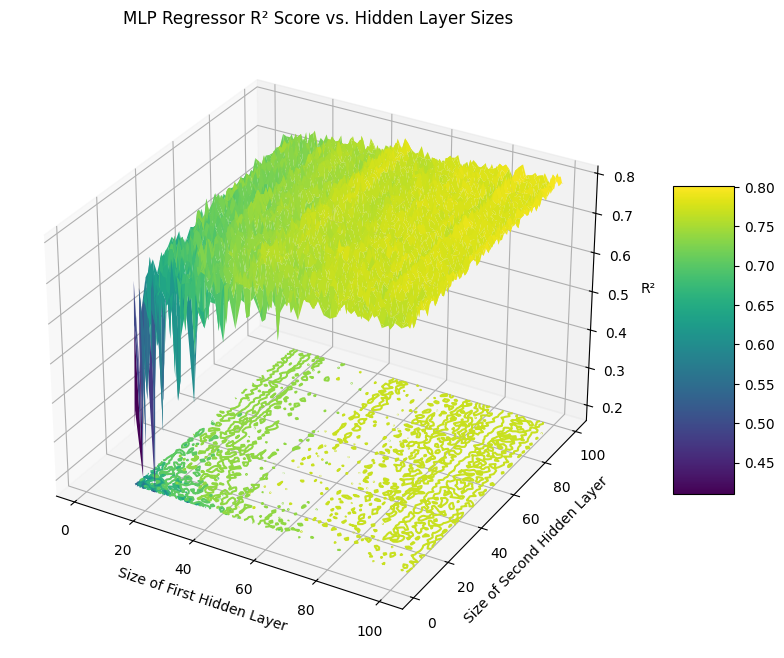

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare data
X_plot, Y_plot = np.meshgrid(layer_sizes_1, layer_sizes_2)

# Reshape R2 scores into grid shape (transposed for matching axes)
Z_full = np.array(r2_scores).reshape(len(layer_sizes_1), len(layer_sizes_2)).T

# Mask surface values
Z_masked = np.ma.masked_where((X_plot < 10) | (Y_plot < 10), Z_full)            # Correct the amount of neurons you want to mask here

# Mask the contour base values manually
Z_contour = Z_full.copy()
Z_contour[(X_plot < 10) | (Y_plot < 10)] = np.nan                               # Correct the amount of neurons you want to mask here

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(X_plot, Y_plot, Z_masked, cmap='viridis', antialiased=True)

# Plot contour lines beneath the surface
contour = ax.contour(
    X_plot, Y_plot, Z_contour,
    levels=10,
    cmap='viridis',
    offset=np.nanmin(Z_contour)
)

# Labels and appearance
ax.set_xlabel('Size of First Hidden Layer')
ax.set_ylabel('Size of Second Hidden Layer')
ax.set_zlabel('R²')
ax.set_title('MLP Regressor R² Score vs. Hidden Layer Sizes')

# Adjust Z limits tightly around data
ax.set_zlim(np.nanmin(Z_contour), np.nanmax(Z_contour))

# Add colorbar
fig.colorbar(surf, shrink=0.5, aspect=5)

# Show plot
plt.show()

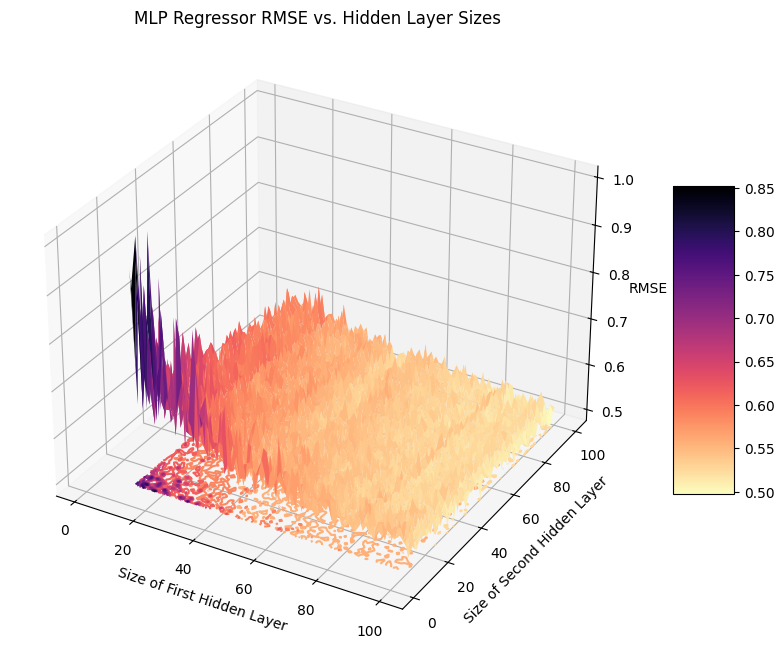

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare meshgrid
X_plot, Y_plot = np.meshgrid(layer_sizes_1, layer_sizes_2)

# Reshape RMSE scores into grid shape (transposed for matching axes)
Z_full_rmse = np.array(rmse_scores).reshape(len(layer_sizes_1), len(layer_sizes_2)).T

# Mask surface values
Z_masked_rmse = np.ma.masked_where((X_plot < 10) | (Y_plot < 10), Z_full_rmse)  # Correct the amount of neurons you want to mask here

# Mask the contour base values manually
Z_contour_rmse = Z_full_rmse.copy()
Z_contour_rmse[(X_plot < 10) | (Y_plot < 10)] = np.nan                          # Correct the amount of neurons you want to mask here

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf_rmse = ax.plot_surface(X_plot, Y_plot, Z_masked_rmse, cmap='magma_r', antialiased=True)

# Plot contour lines beneath the surface
contour = ax.contour(
    X_plot, Y_plot, Z_contour_rmse,
    levels=10,
    cmap='magma_r',
    offset=np.nanmin(Z_contour_rmse)
)

# Labels and appearance
ax.set_xlabel('Size of First Hidden Layer')
ax.set_ylabel('Size of Second Hidden Layer')
ax.set_zlabel('RMSE')
ax.set_title('MLP Regressor RMSE vs. Hidden Layer Sizes')

# Adjust Z limits tightly around data
ax.set_zlim(np.nanmin(Z_contour_rmse), np.nanmax(Z_contour_rmse))

# Add colorbar
fig.colorbar(surf_rmse, shrink=0.5, aspect=5)

# Show plot
plt.show()

contour

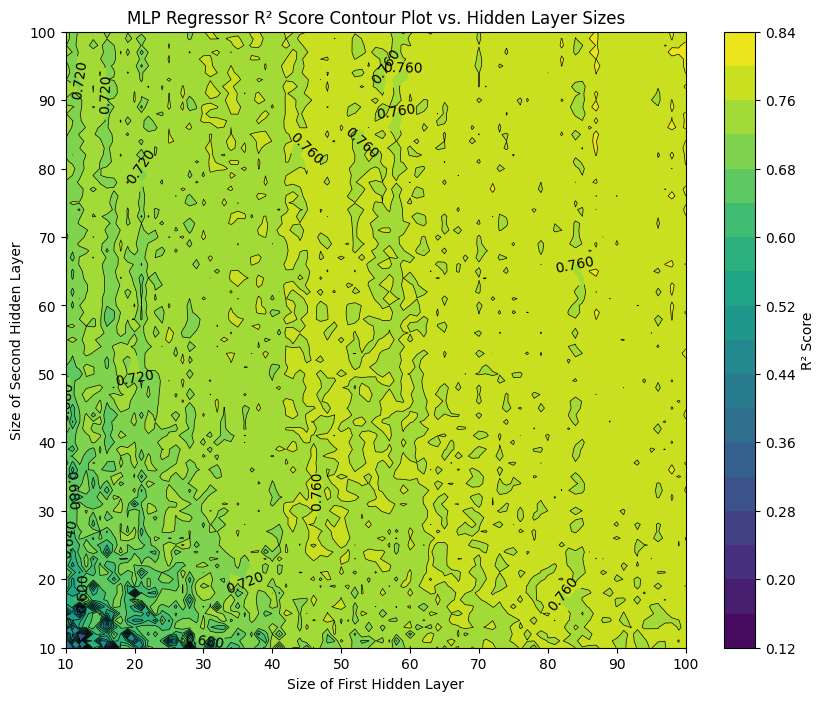

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for 2D contour plotting
X_contour, Y_contour = np.meshgrid(layer_sizes_1, layer_sizes_2)
Z_contour = np.array(r2_scores).reshape(len(layer_sizes_1), len(layer_sizes_2)).T

# Apply mask for regions with neuron sizes < 10
Z_contour_masked = Z_contour.copy()
Z_contour_masked[(X_contour < 10) | (Y_contour < 10)] = np.nan                  # Correct the amount of neurons you want to mask here

# Identify valid (non-NaN) region for axis limits
valid_mask = ~np.isnan(Z_contour_masked)
x_vals_visible = X_contour[valid_mask]
y_vals_visible = Y_contour[valid_mask]

# Get limits around valid data
x_min, x_max = np.min(x_vals_visible), np.max(x_vals_visible)
y_min, y_max = np.min(y_vals_visible), np.max(y_vals_visible)

# Create the 2D contour plot
plt.figure(figsize=(10, 8))

# Plot filled contours
contourf = plt.contourf(X_contour, Y_contour, Z_contour_masked, levels=20, cmap='viridis')

# Plot contour lines
contour = plt.contour(X_contour, Y_contour, Z_contour_masked, levels=20, colors='black', linewidths=0.5)

# Add labels to contour lines
plt.clabel(contour, inline=1, fontsize=10, fmt='%1.3f')

# Trim axes to visible contour region
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Add labels and title
plt.xlabel('Size of First Hidden Layer')
plt.ylabel('Size of Second Hidden Layer')
plt.title('MLP Regressor R² Score Contour Plot vs. Hidden Layer Sizes')

# Add a color bar
plt.colorbar(contourf, label='R² Score')

# Display the plot
plt.show()

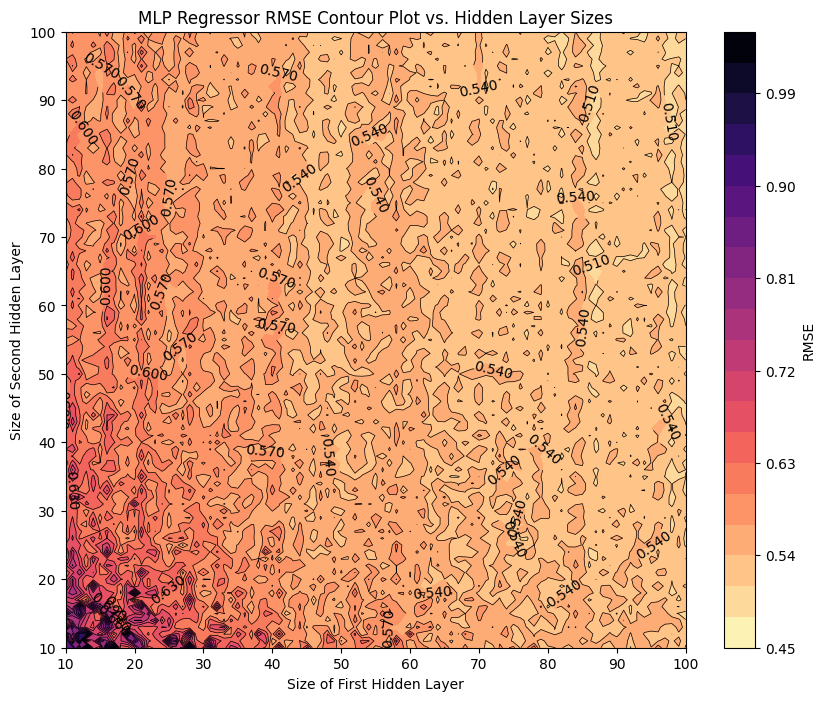

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for 2D contour plotting
X_contour, Y_contour = np.meshgrid(layer_sizes_1, layer_sizes_2)
Z_contour_rmse = np.array(rmse_scores).reshape(len(layer_sizes_1), len(layer_sizes_2)).T

# Mask low-neuron regions (<10)
Z_rmse_masked = Z_contour_rmse.copy()
Z_rmse_masked[(X_contour < 10) | (Y_contour < 10)] = np.nan                     # Correct the amount of neurons you want to mask here

# Identify valid region for axis limits
valid_mask = ~np.isnan(Z_rmse_masked)
x_vals_visible = X_contour[valid_mask]
y_vals_visible = Y_contour[valid_mask]

# Get trimmed axis limits
x_min, x_max = np.min(x_vals_visible), np.max(x_vals_visible)
y_min, y_max = np.min(y_vals_visible), np.max(y_vals_visible)

# Create the 2D contour plot
plt.figure(figsize=(10, 8))

# Plot filled contours (ignores NaNs)
contourf = plt.contourf(X_contour, Y_contour, Z_rmse_masked, levels=20, cmap='magma_r')

# Plot contour lines
contour = plt.contour(X_contour, Y_contour, Z_rmse_masked, levels=20, colors='black', linewidths=0.5)

# Add labels to contour lines
plt.clabel(contour, inline=1, fontsize=10, fmt='%1.3f')

# Set axis limits to valid data range
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Add labels and title
plt.xlabel('Size of First Hidden Layer')
plt.ylabel('Size of Second Hidden Layer')
plt.title('MLP Regressor RMSE Contour Plot vs. Hidden Layer Sizes')

# Add a color bar
plt.colorbar(contourf, label='RMSE')

# Display the plot
plt.show()

In [20]:
import numpy as np

# Function to find best R² and lowest RMSE within a given range
def find_best_r2_and_rmse_in_range(r2_scores, rmse_scores, sizes_1, sizes_2,
                                   size1_min, size1_max, size2_min, size2_max, title):
    """
    Finds the best (maximum) R² and best (minimum) RMSE along with their corresponding hidden layer sizes
    within a specified size range.

    Args:
        r2_scores (list): List of R² scores.
        rmse_scores (list): List of RMSE scores.
        sizes_1 (list): List of first hidden layer sizes.
        sizes_2 (list): List of second hidden layer sizes.
        size1_min (int): Minimum value for size1 (exclusive).
        size1_max (int): Maximum value for size1 (exclusive).
        size2_min (int): Minimum value for size2 (exclusive).
        size2_max (int): Maximum value for size2 (exclusive).
        title (str): Title for the output.
    """
    r2_filtered = []
    rmse_filtered = []
    sizes_1_filtered = []
    sizes_2_filtered = []

    for i in range(len(r2_scores)):
        if size1_min < sizes_1[i] < size1_max and size2_min < sizes_2[i] < size2_max:
            if not np.isnan(r2_scores[i]) and not np.isnan(rmse_scores[i]):
                r2_filtered.append(r2_scores[i])
                rmse_filtered.append(rmse_scores[i])
                sizes_1_filtered.append(sizes_1[i])
                sizes_2_filtered.append(sizes_2[i])

    print(f"\n{title}:")
    if r2_filtered:
        # Best R² (maximize)
        best_r2_index = np.argmax(r2_filtered)
        best_r2_size1 = sizes_1_filtered[best_r2_index]
        best_r2_size2 = sizes_2_filtered[best_r2_index]
        best_r2 = r2_filtered[best_r2_index]

        print(f"🔷 Best R² Score: {best_r2:.4f} at (size1={best_r2_size1}, size2={best_r2_size2})")

        # Best RMSE (minimize)
        best_rmse_index = np.argmin(rmse_filtered)
        best_rmse_size1 = sizes_1_filtered[best_rmse_index]
        best_rmse_size2 = sizes_2_filtered[best_rmse_index]
        best_rmse = rmse_filtered[best_rmse_index]

        print(f"🔶 Lowest RMSE: {best_rmse:.4f} at (size1={best_rmse_size1}, size2={best_rmse_size2})")
    else:
        print("No valid data points found in the specified interval.")

# Example usage:
find_best_r2_and_rmse_in_range(r2_scores, rmse_scores, sizes_1, sizes_2, 1, 21, 1, 21,
                               "Best R² and RMSE for 1 < size1 < 21 and 1 < size2 < 21")

find_best_r2_and_rmse_in_range(r2_scores, rmse_scores, sizes_1, sizes_2, 1, 101, 1, 101,
                               "Best R² and RMSE for 1 < size1 < 101 and 1 < size2 < 101")


Best R² and RMSE for 1 < size1 < 21 and 1 < size2 < 21:
🔷 Best R² Score: 0.7307 at (size1=20, size2=17)
🔶 Lowest RMSE: 0.5790 at (size1=20, size2=17)

Best R² and RMSE for 1 < size1 < 101 and 1 < size2 < 101:
🔷 Best R² Score: 0.8184 at (size1=72, size2=77)
🔶 Lowest RMSE: 0.4755 at (size1=72, size2=77)



--- Evaluation for Neural Network (MLP 72, 77) ---
Mean Absolute Error (MAE): 0.3629
Mean Squared Error (MSE): 0.2221
Root Mean Squared Error (RMSE): 0.4713
R-squared (R2): 0.8216


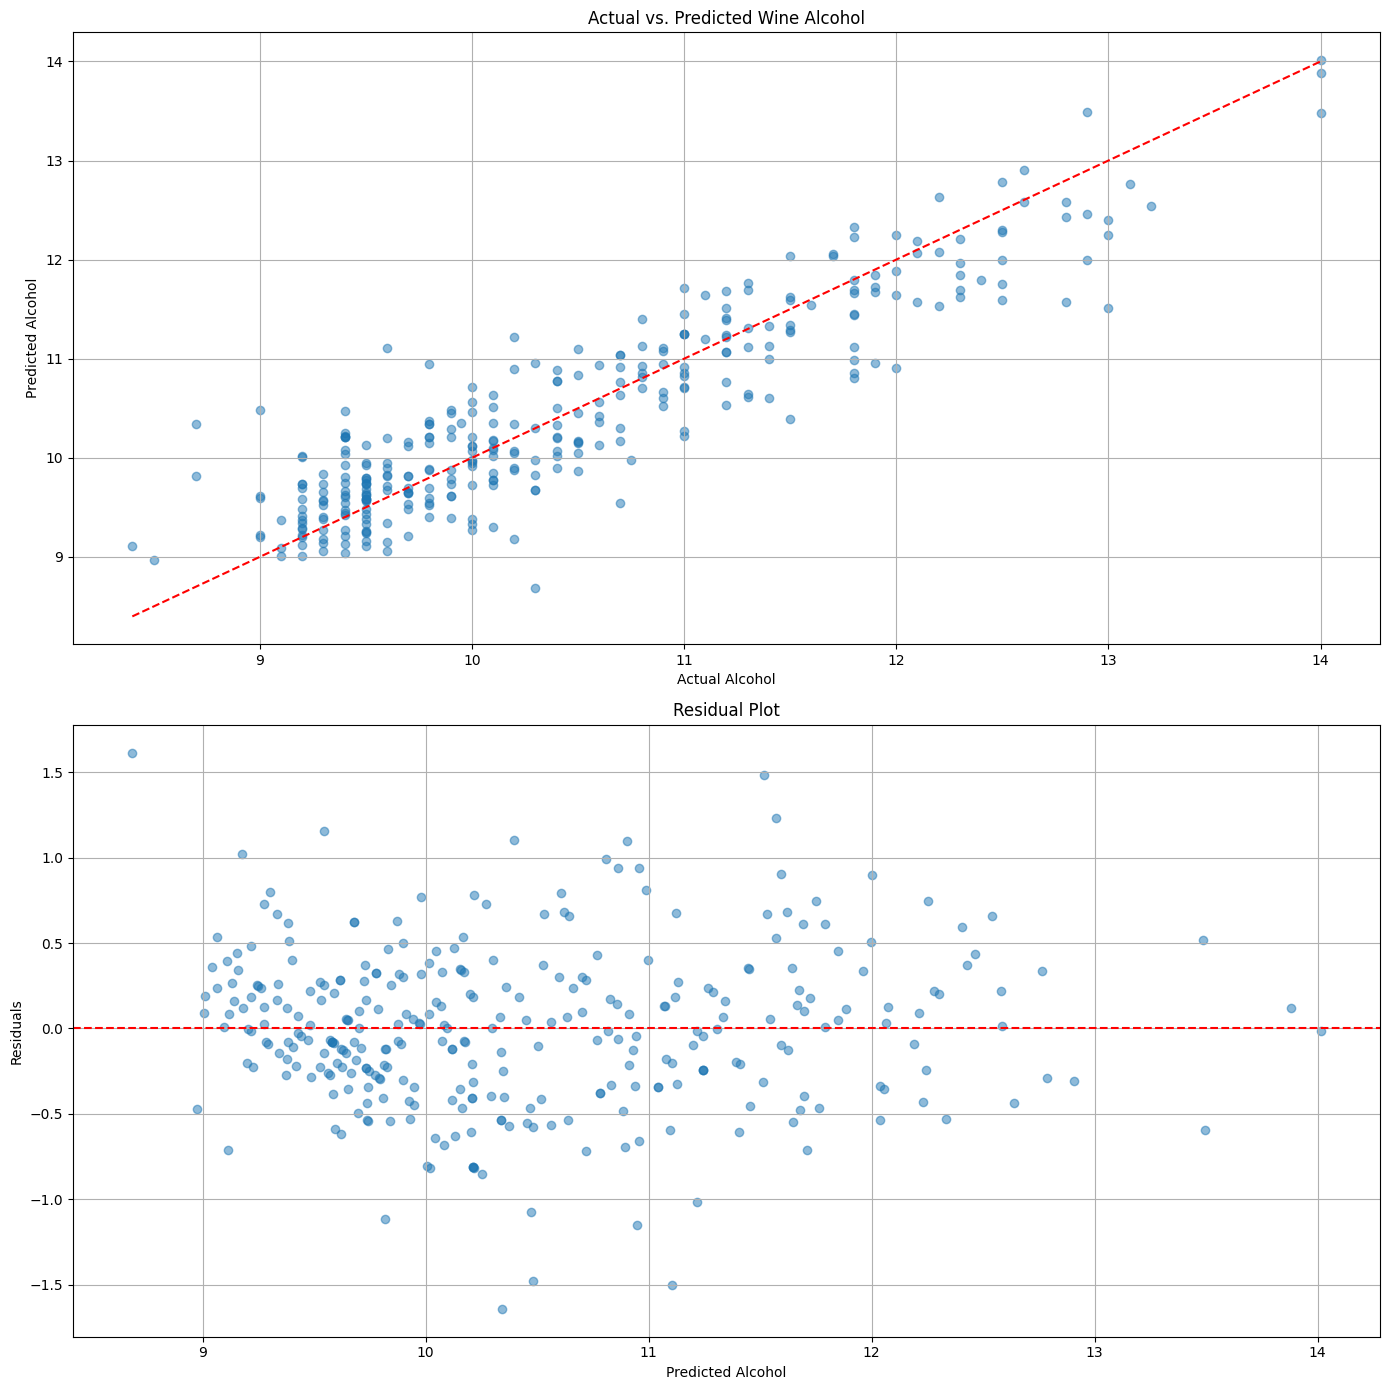

In [21]:
from sklearn.neural_network import MLPRegressor

# Initialize MLPRegressor with best hidden layer sizes
mlp_best = MLPRegressor(hidden_layer_sizes=(72, 77), max_iter=10000, random_state=42)

# Train the model
mlp_best.fit(X_train, y_train)

# Make predictions
y_pred_mlp_best = mlp_best.predict(X_test)

# Evaluate the model
evaluate_model(y_test, y_pred_mlp_best, "Neural Network (MLP 72, 77)")

Calculating Permutation Importance...

Permutation Importance (MLP Regressor):


,0
chlorides,0.026370
free sulfur dioxide,0.089104
volatile acidity,0.095845
sulphates,0.116357
citric acid,0.126292
total sulfur dioxide,0.161000
residual sugar,0.247303
pH,0.331064
fixed acidity,0.460960
density,2.122081


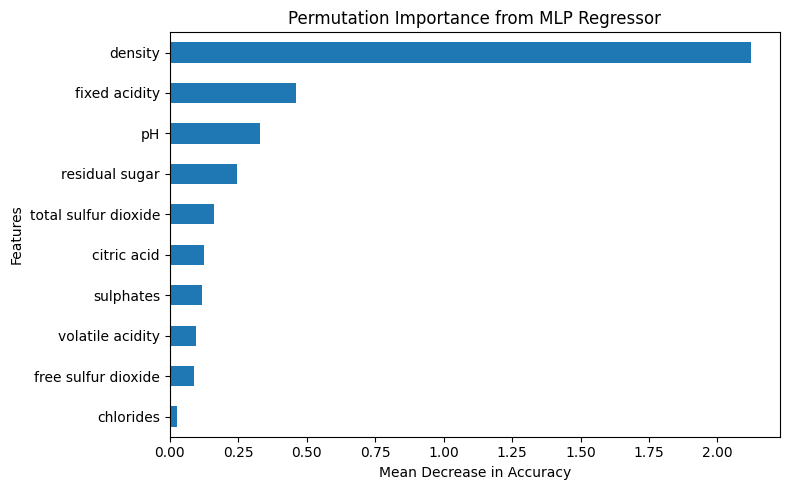

In [22]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

print("Calculating Permutation Importance...")

result = permutation_importance(
    mlp_best, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Sort features by importance
sorted_idx = result.importances_mean.argsort()
feature_importances_permutation = pd.Series(
    result.importances_mean[sorted_idx], index=X_test.columns[sorted_idx]
)

print("\nPermutation Importance (MLP Regressor):")
display(feature_importances_permutation)

# Plot horizontal bar chart of importances
plt.figure(figsize=(8, 5))
feature_importances_permutation.plot(kind='barh')
plt.title("Permutation Importance from MLP Regressor")
plt.xlabel("Mean Decrease in Accuracy")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# DNN - search in range(10, 151, 20)

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Define the range for hidden layer sizes A, B, and C
layer_sizes_range = range(10, 151, 20)

In [ ]:
################################################################################

# DO NOT EXECUTE !!!

################################################################################

# Lists to store results for the scatter plot
r2_3d = []
rmse_3d = []
sizes_A = []
sizes_B = []
sizes_C = []

print("Training MLPRegressor models for different 3-layer hidden layer sizes...")

# Iterate through all combinations of A, B, and C
for size_a in layer_sizes_range:
  for size_b in layer_sizes_range:
    for size_c in layer_sizes_range:
      #print(f"Training with hidden layer sizes: ({size_a}, {size_b}, {size_c})")
      # Create and train the MLPRegressor with the current hidden layer sizes
      mlp_3layer = MLPRegressor(hidden_layer_sizes=(size_a, size_b, size_c), max_iter=500, random_state=42, early_stopping=True)
      try:
        mlp_3layer.fit(X_train, y_train)
        y_pred_mlp_3layer = mlp_3layer.predict(X_test)
        r2 = r2_score(y_test, y_pred_mlp_3layer)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_mlp_3layer))


        # Store the results
        r2_3d.append(r2)
        rmse_3d.append(rmse)
        sizes_A.append(size_a)
        sizes_B.append(size_b)
        sizes_C.append(size_c)

      except Exception as e:
        print(f"Error training MLP with sizes ({size_a}, {size_b}, {size_c}): {e}")
        # Optionally store NaN or skip this combination if training fails
        r2_3d.append(np.nan)
        rmse_3d.append(np.nan)
        sizes_A.append(size_a)
        sizes_B.append(size_b)
        sizes_C.append(size_c)


print("Training complete.")

In [ ]:
# Download the results

"""
import json
from google.colab import files

# Combine the data into a dictionary
data_to_save = {
    'r2_3d': r2_3d,
    'rmse_3d': rmse_3d,
    'sizes_A': sizes_A,
    'sizes_B': sizes_B,
    'sizes_C': sizes_C,
}

# Specify the filename
filename = 'DNN_Reg_10_151_20'

# Save the data to a JSON file
with open(filename, 'w') as f:
    json.dump(data_to_save, f)

# Download the file
files.download(filename)
"""

In [25]:
# Upload the results of the previous analysis

import json

file_path = '/content/drive/My Drive/Novia/Machine Learning Methods/DNN_Reg_10_151_20'
with open(file_path, 'r') as f:
    loaded_data = json.load(f)

r2_3d = loaded_data['r2_3d']
rmse_3d = loaded_data['rmse_3d']
sizes_A = loaded_data['sizes_A']
sizes_B = loaded_data['sizes_B']
sizes_C = loaded_data['sizes_C']

In [26]:
import numpy as np
# Find the index of the maximum R2 and minimum RMSE
best_r2_index = np.argmax(r2_3d)
min_rmse_index = np.argmin(rmse_3d)

# Get the best R2, minimum RMSE and corresponding hidden layer sizes
best_r2_3d = r2_3d[best_r2_index]
best_r2_size_A = sizes_A[best_r2_index]
best_r2_size_B = sizes_B[best_r2_index]
best_r2_size_C = sizes_C[best_r2_index]

min_rmse_3d = rmse_3d[min_rmse_index]
min_rmse_size_A = sizes_A[min_rmse_index]
min_rmse_size_B = sizes_B[min_rmse_index]
min_rmse_size_C = sizes_C[min_rmse_index]


print(f"Best R² for the 3-layer MLP: {best_r2_3d:.4f}")
print(f"Associated hidden_layer_sizes: ({best_r2_size_A}, {best_r2_size_B}, {best_r2_size_C})")
print(f"Lowest RMSE for the 3-layer MLP: {min_rmse_3d:.4f}")
print(f"Associated hidden_layer_sizes: ({min_rmse_size_A}, {min_rmse_size_B}, {min_rmse_size_C})")

Best R² for the 3-layer MLP: 0.8194
Associated hidden_layer_sizes: (150, 70, 70)
Lowest RMSE for the 3-layer MLP: 0.4741
Associated hidden_layer_sizes: (150, 70, 70)


plot

In [27]:
import plotly.express as px

# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(x=sizes_A, y=sizes_B, z=sizes_C, color=r2_3d,  # Changed color to r2_3d
                    labels={'x': 'Size of First Layer (A)',
                            'y': 'Size of Second Layer (B)',
                            'z': 'Size of Third Layer (C)',
                            'color': 'R² Score'},  # Changed color label to R² Score
                    title='MLP R² Score vs. Three Layer Sizes (Interactive)', # Changed title
                    color_continuous_scale='viridis')

# Update the layout to make the window taller
fig.update_layout(height=500)

fig.show()

In [28]:
import plotly.express as px

# Create an interactive 3D scatter plot using Plotly for RMSE
fig = px.scatter_3d(x=sizes_A, y=sizes_B, z=sizes_C, color=rmse_3d,
                    labels={'x': 'Size of First Layer (A)',
                            'y': 'Size of Second Layer (B)',
                            'z': 'Size of Third Layer (C)',
                            'color': 'RMSE'},
                    title='MLP RMSE vs. Three Layer Sizes (Interactive)',
                    color_continuous_scale='magma_r') # Using a reverse colormap for RMSE (lower is better)

# Update the layout
fig.update_layout(height=700)

fig.show()

performances


--- Evaluation for Deep Neural Network (DNN) (150, 70, 70) ---
Mean Absolute Error (MAE): 0.3591
Mean Squared Error (MSE): 0.2248
Root Mean Squared Error (RMSE): 0.4741
R-squared (R2): 0.8194


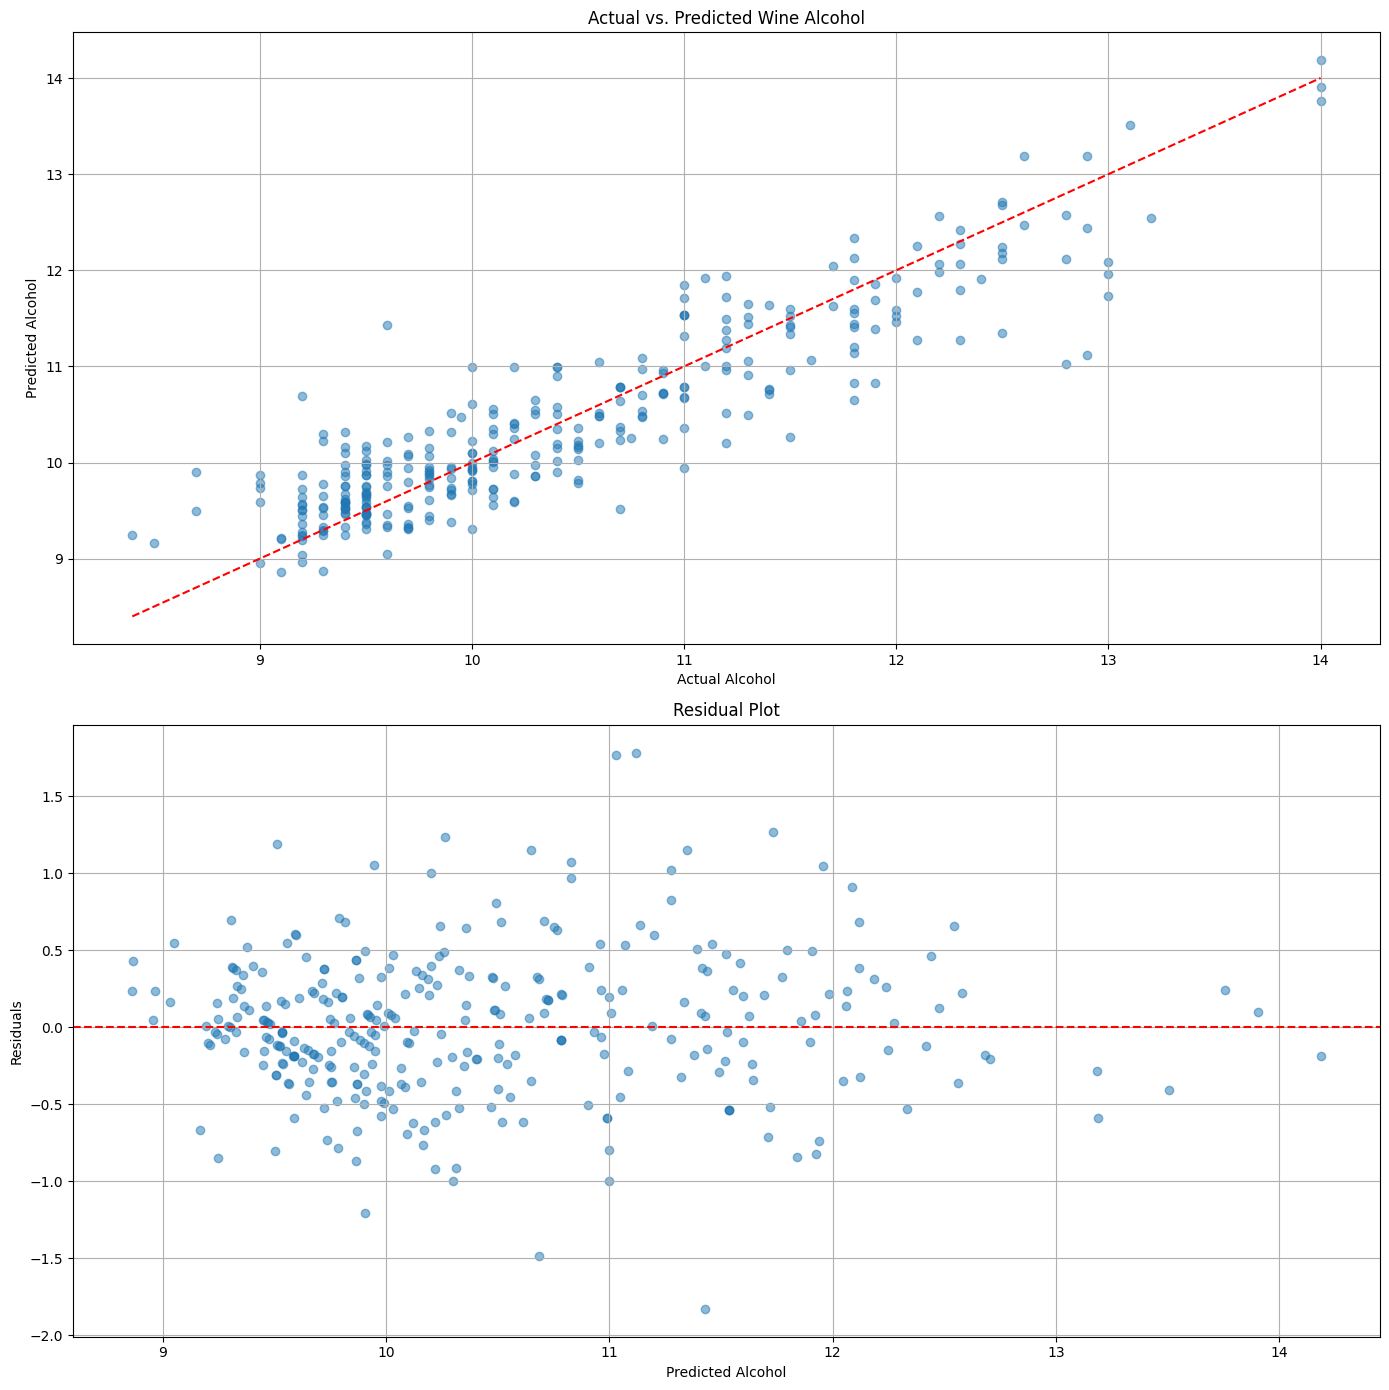

In [29]:
# 4️⃣ Deep Neural Network (DNN Regressor)
from sklearn.neural_network import MLPRegressor

# Using more hidden layers for a deeper network
dnn = MLPRegressor(hidden_layer_sizes=(150, 70, 70), max_iter=1000, random_state=42, early_stopping=True)
dnn.fit(X_train, y_train)
y_pred_dnn = dnn.predict(X_test)
evaluate_model(y_test, y_pred_dnn, "Deep Neural Network (DNN) (150, 70, 70)")

# DNN - search near (150, 70, 70) in range 10 neurons and step of 1

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define the range for hidden layer sizes around (150, 70, 70) with a step of 1
layer_sizes_A_research = range(140, 160, 1)
layer_sizes_B_research = range(60, 80, 1)
layer_sizes_C_research = range(60, 80, 1)

In [ ]:
################################################################################

# DO NOT EXECUTE !!!

################################################################################

# Lists to store results for the scatter plot
r2_3d_research = []
rmse_3d_research = []
sizes_A_research = []
sizes_B_research = []
sizes_C_research = []

print("Training MLPRegressor models for different 3-layer hidden layer sizes...")

total_combinations = len(layer_sizes_A_research) * len(layer_sizes_B_research) * len(layer_sizes_C_research)
current_combination = 0

# Iterate through all combinations of A, B, and C
for size_a in layer_sizes_A_research:
  for size_b in layer_sizes_B_research:
    for size_c in layer_sizes_C_research:
      current_combination += 1
      print(f"Training combination {current_combination}/{total_combinations}: ({size_a}, {size_b}, {size_c})")

      # Create and train the MLPRegressor with the current hidden layer sizes
      mlp_3layer_research = MLPRegressor(hidden_layer_sizes=(size_a, size_b, size_c), max_iter=500, random_state=42, early_stopping=True)
      try:
        mlp_3layer_research.fit(X_train, y_train)
        y_pred_mlp_3layer_research = mlp_3layer_research.predict(X_test)
        r2 = r2_score(y_test, y_pred_mlp_3layer_research)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_mlp_3layer_research))


        # Store the results
        r2_3d_research.append(r2)
        rmse_3d_research.append(rmse)
        sizes_A_research.append(size_a)
        sizes_B_research.append(size_b)
        sizes_C_research.append(size_c)

      except Exception as e:
        print(f"Error training MLP with sizes ({size_a}, {size_b}, {size_c}): {e}")
        # Optionally store NaN or skip this combination if training fails
        r2_3d_research.append(np.nan)
        rmse_3d_research.append(np.nan)
        sizes_A_research.append(size_a)
        sizes_B_research.append(size_b)
        sizes_C_research.append(size_c)


print("Training complete.")

In [ ]:
# Download the results

"""
import json
from google.colab import files

# Combine the data into a dictionary
data_to_save = {
    'r2_3d_research': r2_3d_research,
    'rmse_3d_research': rmse_3d_research,
    'sizes_A_research': sizes_A_research,
    'sizes_B_research': sizes_B_research,
    'sizes_C_research': sizes_C_research,
}

# Specify the filename
filename = 'DNN_Reg_150_70_70'

# Save the data to a JSON file
with open(filename, 'w') as f:
    json.dump(data_to_save, f)

# Download the file
files.download(filename)
"""

In [32]:
# Upload the results of the previous analysis

import json

file_path = '/content/drive/My Drive/Novia/Machine Learning Methods/DNN_Reg_150_70_70'
with open(file_path, 'r') as f:
    loaded_data = json.load(f)

r2_3d_research = loaded_data['r2_3d_research']
rmse_3d_research = loaded_data['rmse_3d_research']
sizes_A_research = loaded_data['sizes_A_research']
sizes_B_research = loaded_data['sizes_B_research']
sizes_C_research = loaded_data['sizes_C_research']

In [33]:
import numpy as np
# Find the index of the maximum R2 and minimum RMSE
best_r2_index = np.argmax(r2_3d_research)
min_rmse_index = np.argmin(rmse_3d_research)

# Get the best R2, minimum RMSE and corresponding hidden layer sizes
best_r2_3d = r2_3d_research[best_r2_index]
best_r2_size_A = sizes_A_research[best_r2_index]
best_r2_size_B = sizes_B_research[best_r2_index]
best_r2_size_C = sizes_C_research[best_r2_index]

min_rmse_3d = rmse_3d_research[min_rmse_index]
min_rmse_size_A = sizes_A_research[min_rmse_index]
min_rmse_size_B = sizes_B_research[min_rmse_index]
min_rmse_size_C = sizes_C_research[min_rmse_index]


print(f"Best R² for the 3-layer MLP: {best_r2_3d:.4f}")
print(f"Associated hidden_layer_sizes: ({best_r2_size_A}, {best_r2_size_B}, {best_r2_size_C})")
print(f"Lowest RMSE for the 3-layer MLP: {min_rmse_3d:.4f}")
print(f"Associated hidden_layer_sizes: ({min_rmse_size_A}, {min_rmse_size_B}, {min_rmse_size_C})")

Best R² for the 3-layer MLP: 0.8227
Associated hidden_layer_sizes: (142, 69, 66)
Lowest RMSE for the 3-layer MLP: 0.4698
Associated hidden_layer_sizes: (142, 69, 66)


plot

In [34]:
import plotly.express as px

# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(x=sizes_A_research, y=sizes_B_research, z=sizes_C_research, color=r2_3d_research,  # Changed color to r2_3d
                    labels={'x': 'Size of First Layer (A)',
                            'y': 'Size of Second Layer (B)',
                            'z': 'Size of Third Layer (C)',
                            'color': 'R² Score'},  # Changed color label to R² Score
                    title='MLP R² Score vs. Three Layer Sizes (Interactive)', # Changed title
                    color_continuous_scale='viridis')

# Update the layout to make the window taller
fig.update_layout(height=500)

fig.show()

In [35]:
import plotly.express as px

# Create an interactive 3D scatter plot using Plotly for RMSE
fig = px.scatter_3d(x=sizes_A_research, y=sizes_B_research, z=sizes_C_research, color=rmse_3d_research,
                    labels={'x': 'Size of First Layer (A)',
                            'y': 'Size of Second Layer (B)',
                            'z': 'Size of Third Layer (C)',
                            'color': 'RMSE'},
                    title='MLP RMSE vs. Three Layer Sizes (Interactive)',
                    color_continuous_scale='magma_r') # Using a reverse colormap for RMSE (lower is better)

# Update the layout
fig.update_layout(height=500)

fig.show()

performances


--- Evaluation for Deep Neural Network (DNN) (142, 69, 66) ---
Mean Absolute Error (MAE): 0.3526
Mean Squared Error (MSE): 0.2207
Root Mean Squared Error (RMSE): 0.4698
R-squared (R2): 0.8227


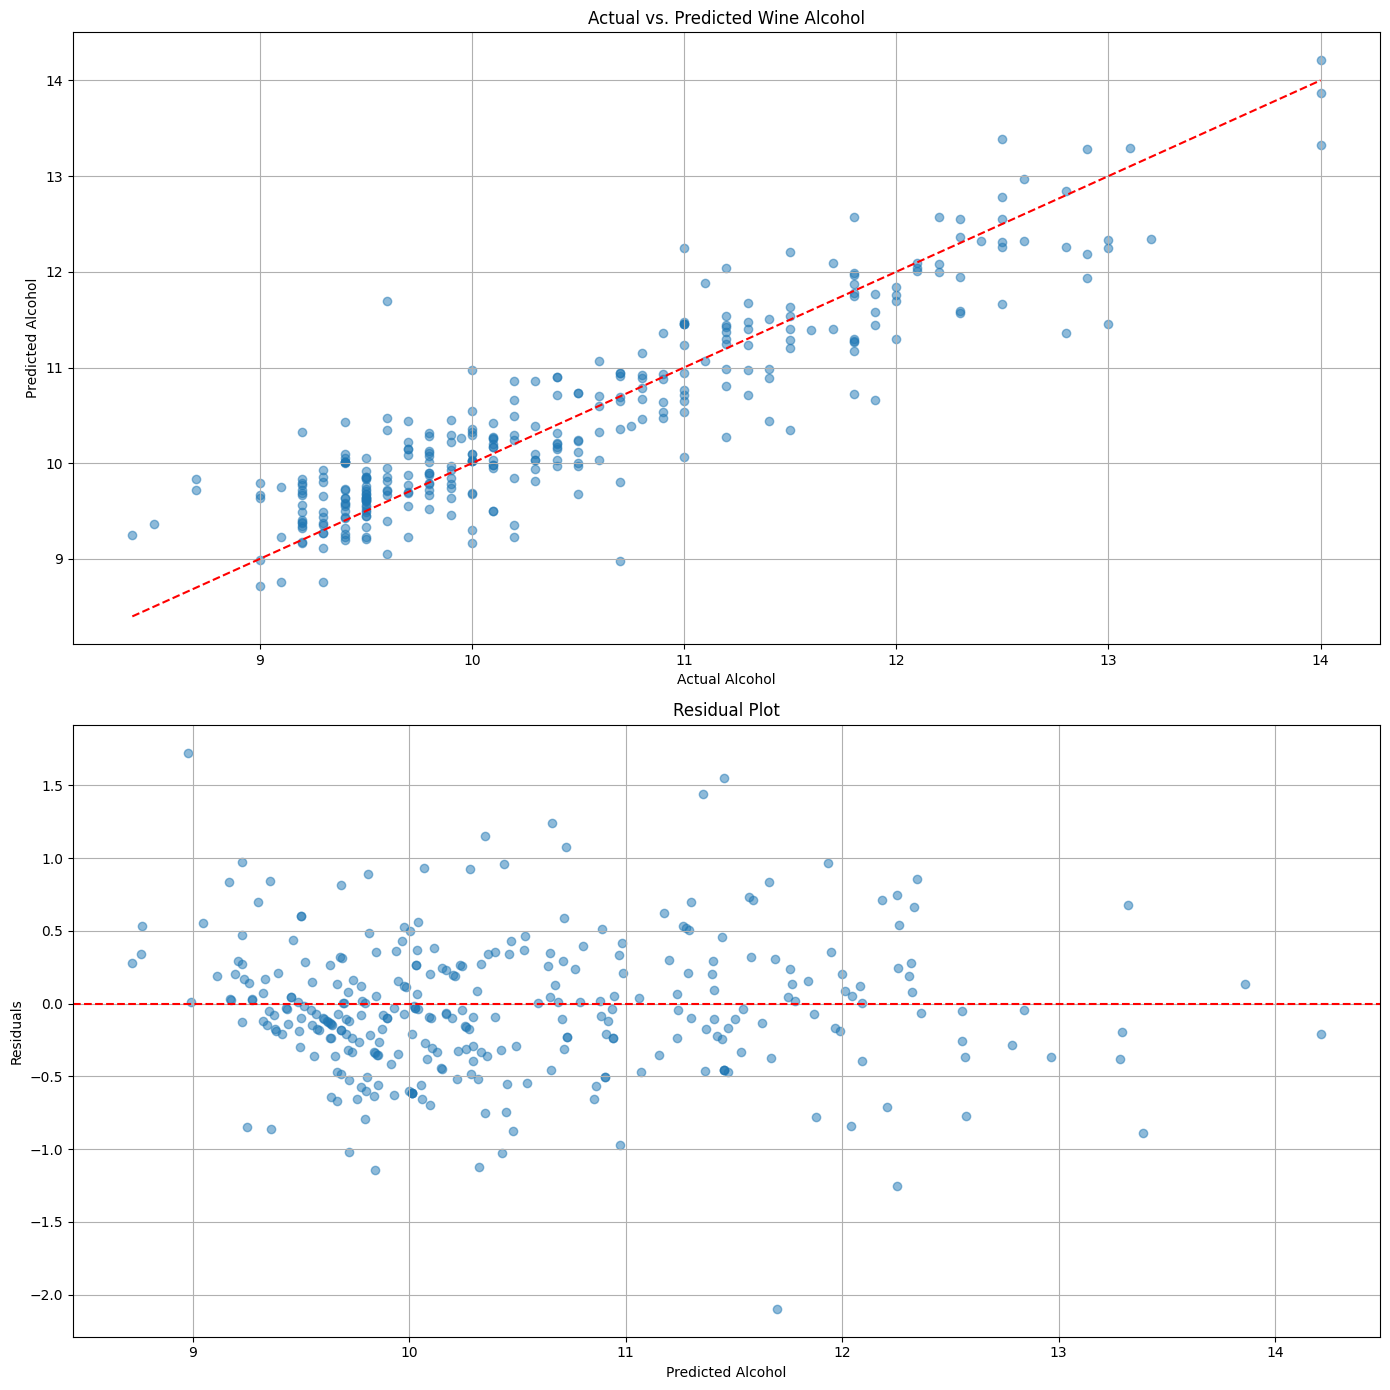

In [36]:
# 4️⃣ Deep Neural Network (DNN Regressor)
from sklearn.neural_network import MLPRegressor

# Using more hidden layers for a deeper network
dnn = MLPRegressor(hidden_layer_sizes=(142, 69, 66), max_iter=1000, random_state=42, early_stopping=True)
dnn.fit(X_train, y_train)
y_pred_dnn = dnn.predict(X_test)
evaluate_model(y_test, y_pred_dnn, "Deep Neural Network (DNN) (142, 69, 66)")

# CNN

In [38]:
# 5️⃣ Convolutional Neural Network (CNN)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# CNNs typically work with data that has a spatial structure.
# For tabular data, we can treat features as a 1D sequence.
# We also need to reshape the input data to be 3D (samples, timesteps, features)

# Convert target variable to one-hot encoding for Keras
# Need to adjust the number of categories based on the actual quality levels in the data
# Get unique quality levels and map them to integers starting from 0


# Define some of the hyperparameters
filters1 = 32
filters2 = 64
kernel_size1 = 2
kernel_size2 = 2
#activation
rate1 = 0.5
rate2 = 0.5
n_neurons_fist_dense_layer = 100
epochs_hist = 50
batch_size_hist = 32


# Use y_train and y_test directly for regression
y_train_cnn = y_train
y_test_cnn = y_test


# Reshape data for CNN (add a channel dimension)
# CNNs, especially Conv1D used here, expect input data to have a specific shape: (samples, timesteps, features). Since your data is tabular, it's initially 2D (samples, features). This code reshapes the data by adding a third dimension of size 1, effectively treating each feature as a single timestep.
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
################################################################################

# DO NOT EXECUTE !!!

################################################################################

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from sklearn.metrics import mean_squared_error, r2_score # Import regression metrics
import numpy as np

# ---------------------- Hyperparameter Search ----------------------
def build_and_train_cnn(filters1, filters2, kernel_size1, kernel_size2, rate1, rate2,
                        n_neurons_fist_dense_layer, batch_size_hist, epochs_hist=50):

    model = Sequential()
    model.add(Conv1D(filters=filters1, kernel_size=kernel_size1, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
    model.add(Dropout(rate1))
    model.add(Conv1D(filters=filters2, kernel_size=kernel_size2, activation='relu'))
    model.add(Dropout(rate2))
    model.add(Flatten())
    model.add(Dense(n_neurons_fist_dense_layer, activation='relu'))
    # Changed the output layer for regression (single neuron, no activation for linear output)
    model.add(Dense(1))

    # Changed loss function and metric for regression
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    model.fit(X_train_cnn, y_train_cnn, epochs=epochs_hist, batch_size=batch_size_hist, verbose=0, validation_data=(X_test_cnn, y_test_cnn))

    y_pred = model.predict(X_test_cnn)

    # Return RMSE (or other suitable regression metric) instead of accuracy
    rmse = np.sqrt(mean_squared_error(y_test_cnn, y_pred))
    r2 = r2_score(y_test_cnn, y_pred)

    return rmse, r2

# ---------------------- Hyperparameter Ranges ----------------------
filters1_range = [128, 64, 32, 16]
filters2_range = [256, 128, 64, 32]
kernel_size1_range = [5, 4, 3, 2]
kernel_size2_range = [5, 4, 3, 2]
dropout1_range = [0.5, 0.4, 0.3, 0.2]
dropout2_range = [0.5, 0.4, 0.3, 0.2]
dense_units_range = [256, 128, 100, 64]
batch_size_range = [64, 32, 16]
epochs_hist = 50  # Fixed for all runs

# ---------------------- Default Starting Values ----------------------
best_params = {
    'filters1': 32,
    'filters2': 64,
    'kernel_size1': 2,
    'kernel_size2': 2,
    'rate1': 0.5,
    'rate2': 0.5,
    'n_neurons_fist_dense_layer': 100,
    'batch_size_hist': 32,
    'epochs_hist': epochs_hist
}

def search_best_param(param_name, values):
    best_rmse = float('inf') # Initialize with a large value for minimization
    best_r2 = -float('inf') # Initialize with a small value for maximization
    best_val = None
    for val in values:
        params = best_params.copy()
        params[param_name] = val
        rmse, r2 = build_and_train_cnn(**params)
        print(f"{param_name} = {val}, RMSE = {rmse:.4f}, R2 = {r2:.4f}")
        # We are looking for the lowest RMSE and highest R2
        if rmse < best_rmse and r2 > best_r2:
            best_rmse = rmse
            best_r2 = r2
            best_val = val
    best_params[param_name] = best_val
    print(f"✅ Best {param_name} = {best_val} with RMSE = {best_rmse:.4f} and R2 = {best_r2:.4f}\n")

# ---------------------- Run Search ----------------------
# Note: Before running this search, you need to define X_train_cnn, y_train_cnn, X_test_cnn, and y_test_cnn
# These should be reshaped to have a third dimension for the Conv1D layer (e.g., X_train.reshape(X_train.shape[0], X_train.shape[1], 1))

search_best_param('filters1', filters1_range)
search_best_param('filters2', filters2_range)
search_best_param('kernel_size1', kernel_size1_range)
search_best_param('kernel_size2', kernel_size2_range)
search_best_param('rate1', dropout1_range)
search_best_param('rate2', dropout2_range)
search_best_param('n_neurons_fist_dense_layer', dense_units_range)
search_best_param('batch_size_hist', batch_size_range)

# ---------------------- Final Best Parameters (after running the search) ----------------------
print("🏁 Final Best Parameters:")
for k, v in best_params.items():
    print(f"{k}: {v}")

In [ ]:
# ✅ Best batch_size_hist = 32 with Accuracy = 0.6469
#
# 🏁 Final Best Parameters:
# filters1: 128
# filters2: 256
# kernel_size1: 3     ### it was 4 in classification
# kernel_size2: 5
# rate1: 0.3      ### it was 0.2 in classification
# rate2: 0.3
# n_neurons_fist_dense_layer: 100
# batch_size_hist: 16    ### it was 32 in classification
# epochs_hist: 50

Training CNN model with best parameters...
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 38.6126 - mae: 4.8033 - val_loss: 3.7258 - val_mae: 1.4677
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.8962 - mae: 1.3258 - val_loss: 1.2934 - val_mae: 0.8772
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.3041 - mae: 0.8957 - val_loss: 0.6318 - val_mae: 0.6133
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.8169 - mae: 0.7222 - val_loss: 0.4480 - val_mae: 0.5072
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.7946 - mae: 0.6884 - val_loss: 0.4582 - val_mae: 0.5191
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7612 - mae: 0.6729 - val_loss: 0.4012 - val_mae: 0.4721
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.7388 - mae: 0.6758 - val_loss: 0.4600 - val_mae: 0.5434
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7896 - mae: 0.6861 - val_loss: 0.4978 - val_mae: 0.5346
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.8029 - mae: 0.6

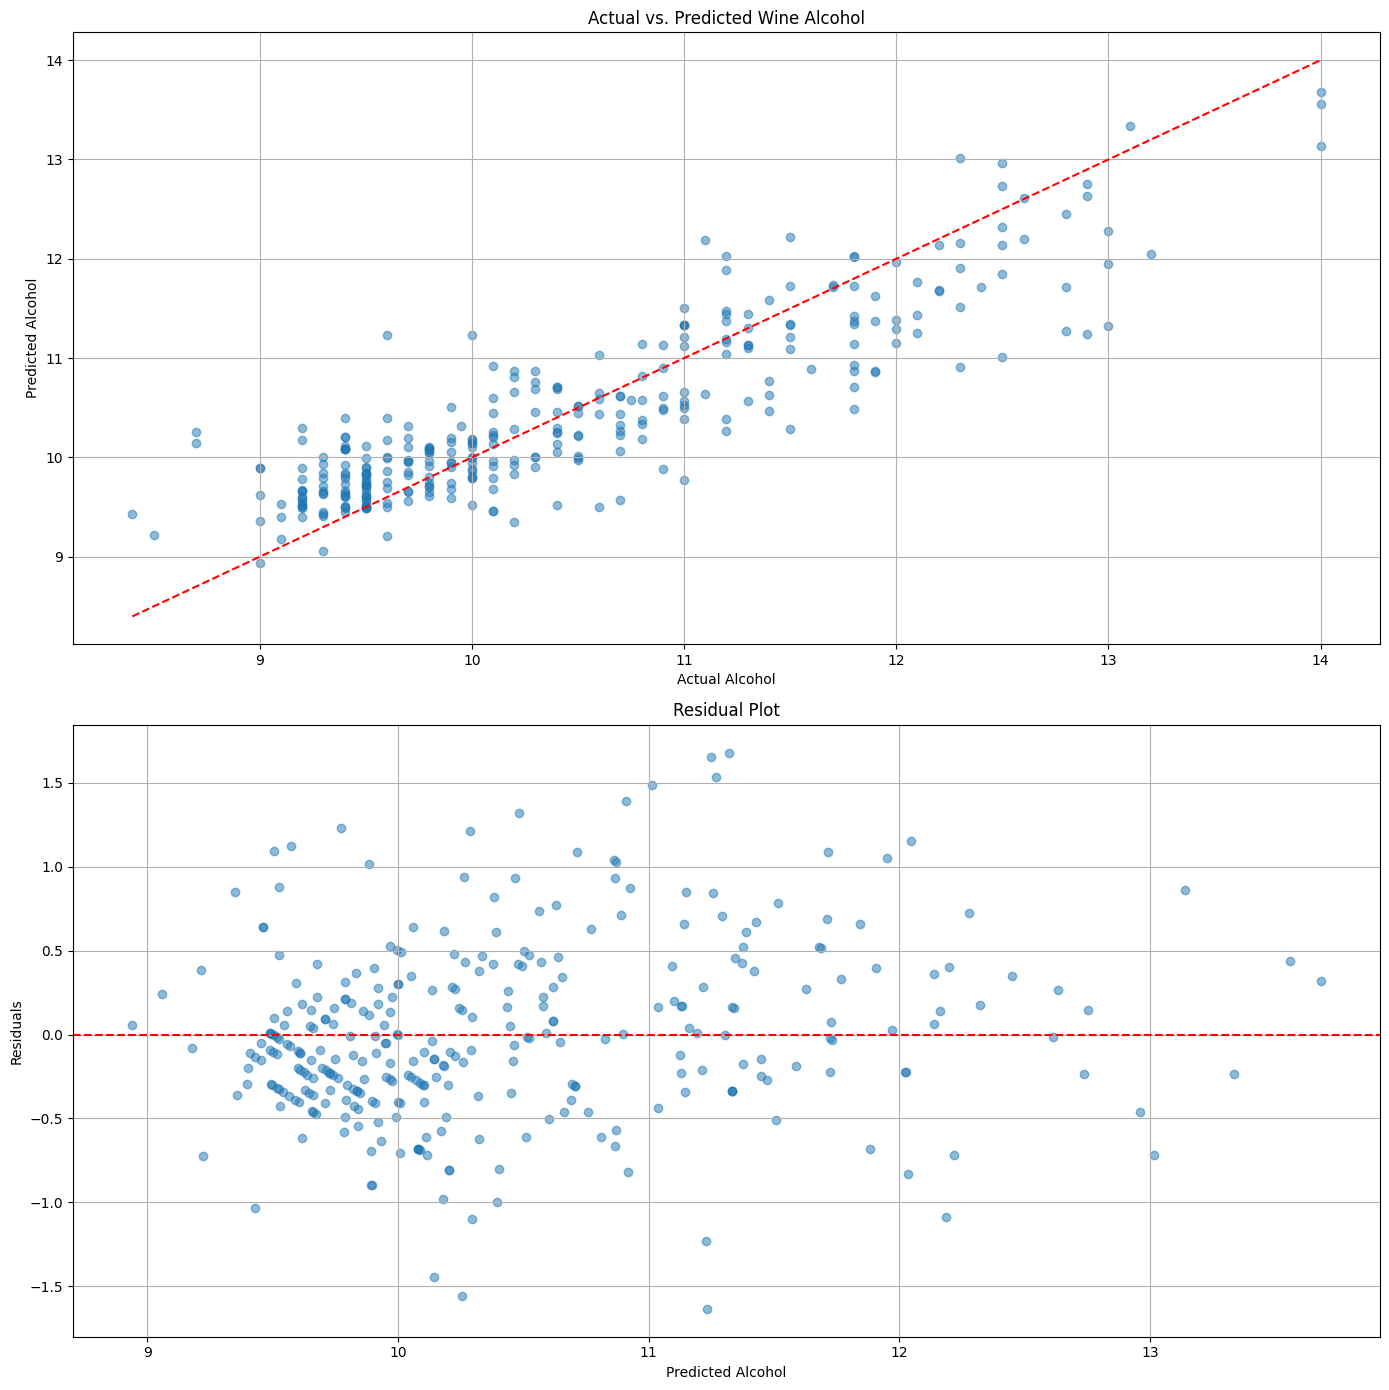

In [39]:
# Evaluate the CNN model with the best parameters

# Define the best parameters found from the hyperparameter search
best_filters1 = 128
best_filters2 = 256
best_kernel_size1 = 3
best_kernel_size2 = 5
best_rate1 = 0.3
best_rate2 = 0.3
best_n_neurons_fist_dense_layer = 100
best_batch_size_hist = 16
best_epochs_hist = 50 # Or the best number of epochs if you tracked that

# Build the CNN model with the best parameters
cnn_best = Sequential()
cnn_best.add(Conv1D(filters=best_filters1, kernel_size=best_kernel_size1, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_best.add(Dropout(best_rate1))
cnn_best.add(Conv1D(filters=best_filters2, kernel_size=best_kernel_size2, activation='relu'))
cnn_best.add(Dropout(best_rate2))
cnn_best.add(Flatten())
cnn_best.add(Dense(best_n_neurons_fist_dense_layer, activation='relu'))
cnn_best.add(Dense(1)) # Output layer for regression

# Compile the model
cnn_best.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
print("Training CNN model with best parameters...")
history = cnn_best.fit(X_train_cnn, y_train_cnn,
                       epochs=best_epochs_hist,
                       batch_size=best_batch_size_hist,
                       verbose=1, # Set verbose to 1 to see training progress
                       validation_data=(X_test_cnn, y_test_cnn))

# Make predictions
y_pred_cnn_best = cnn_best.predict(X_test_cnn)

# Flatten the predictions to match the shape of y_test
y_pred_cnn_best_flattened = y_pred_cnn_best.flatten()


# Evaluate the model using the evaluate_model function
evaluate_model(y_test_cnn, y_pred_cnn_best_flattened, "Convolutional Neural Network (CNN)")

# Tabnet

In [41]:
%%capture
# 1. Install PyTorch TabNet
!pip install pytorch-tabnet

# 2. Import required module
from pytorch_tabnet.tab_model import TabNetRegressor
import torch

In [42]:
# 3. Define the TabNetRegressor model
tabnet_model = TabNetRegressor(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    verbose=0,
    seed=42
)

# 4. Train the TabNet model
tabnet_model.fit(
    X_train=X_train.values,
    y_train=y_train.values.reshape(-1, 1),  # TabNet expects 2D array for y
    eval_set=[(X_test.values, y_test.values.reshape(-1, 1))],
    patience=10,
    max_epochs=200,
    eval_metric=['rmse']
)


Early stopping occurred at epoch 94 with best_epoch = 84 and best_val_0_rmse = 0.67333


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!




--- Evaluation for TabNet Regressor ---
Mean Absolute Error (MAE): 0.5280
Mean Squared Error (MSE): 0.4534
Root Mean Squared Error (RMSE): 0.6733
R-squared (R2): 0.6358


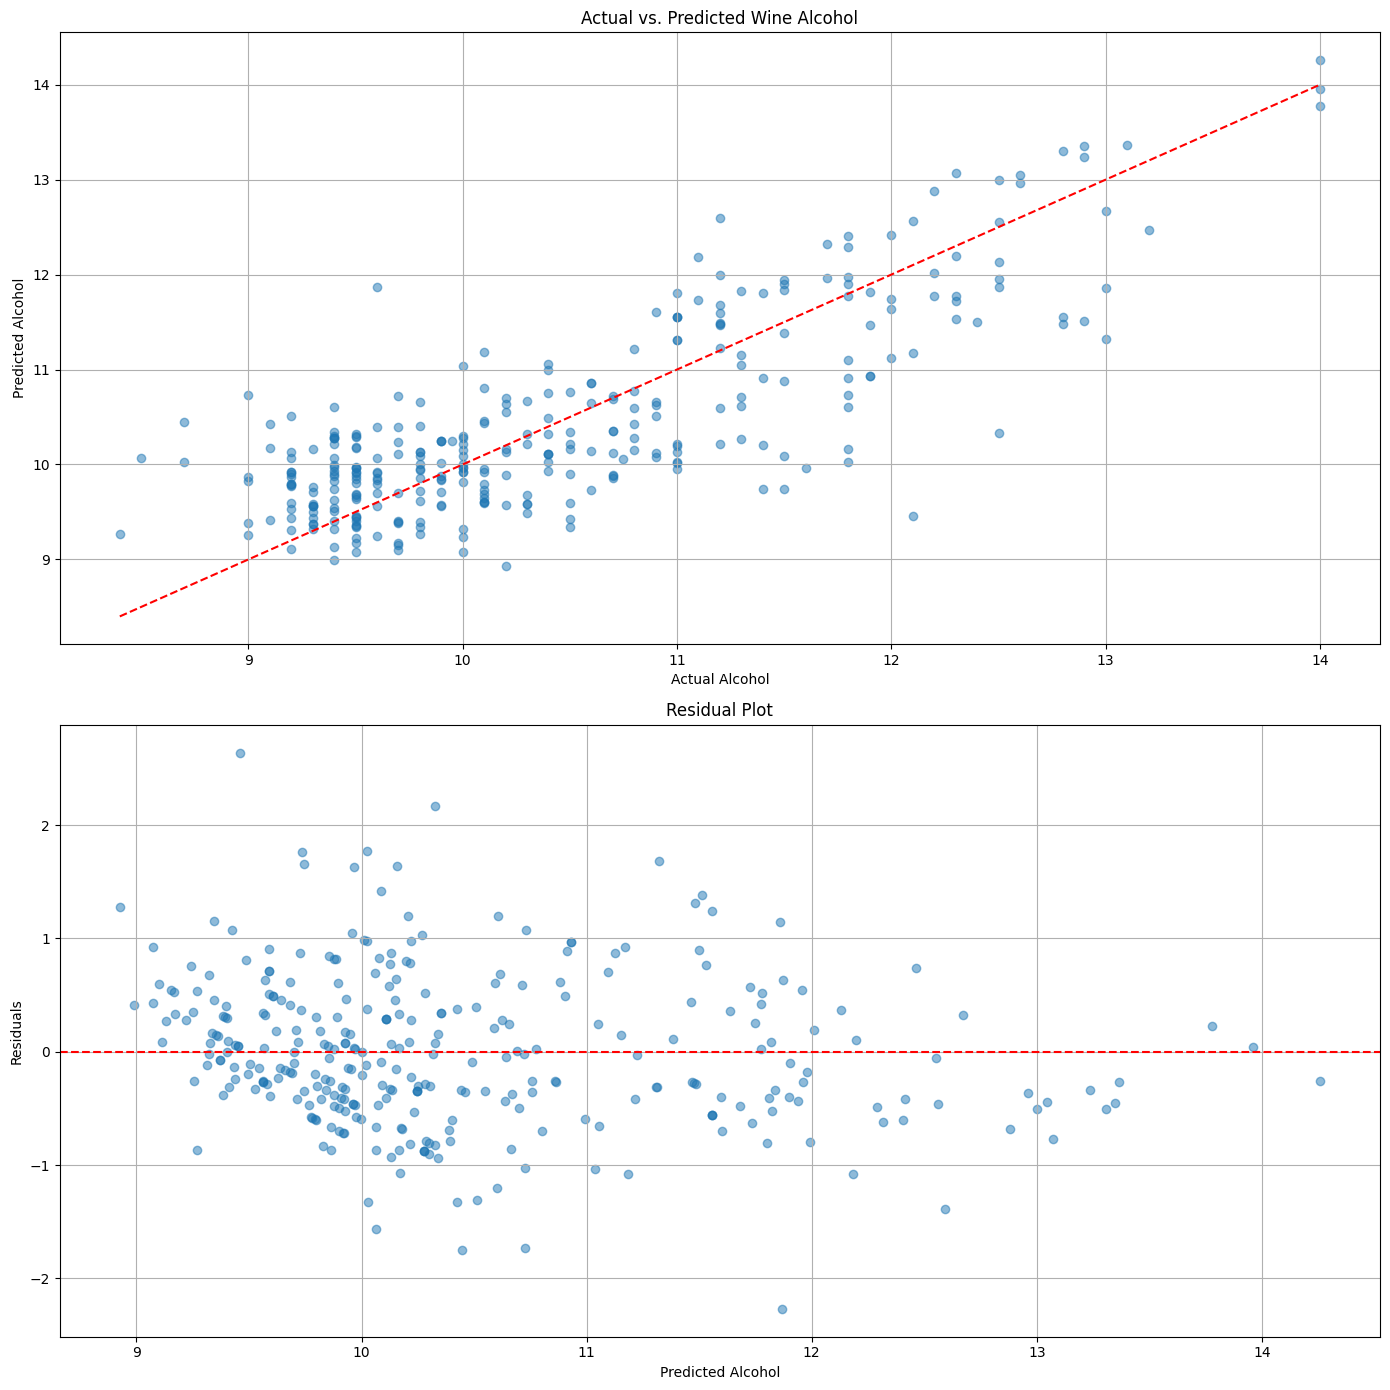

In [43]:
# 5. Make predictions
y_pred_tabnet = tabnet_model.predict(X_test.values).flatten()  # Flatten to 1D for metric functions

# 6. Evaluate the model
evaluate_model(y_test, y_pred_tabnet, "TabNet Regressor")

# W&DL

In [44]:
# Prepare data for W&DL — use same input for both wide and deep parts
X_train_wide = X_train.copy()
X_test_wide = X_test.copy()

X_train_deep = X_train.copy()
X_test_deep = X_test.copy()

y_train_reg = y_train.values  # No mapping or encoding
y_test_reg = y_test.values

In [45]:
# Define the architecture

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate

# Input shapes
input_shape = X_train.shape[1]

# Wide input branch
wide_input = Input(shape=(input_shape,), name='wide_input')
wide_dense = Dense(1, activation='linear', name='wide_dense')(wide_input)

# Deep input branch
deep_input = Input(shape=(input_shape,), name='deep_input')
deep_layer_1 = Dense(128, activation='relu')(deep_input)
deep_layer_2 = Dense(64, activation='relu')(deep_layer_1)
deep_layer_3 = Dense(32, activation='relu')(deep_layer_2)

# Combine wide + deep
combined = concatenate([wide_input, deep_layer_3])
combined_output = Dense(1, activation='linear', name='combined_output')(combined)

# Final model
wide_and_deep_model = Model(inputs=[wide_input, deep_input], outputs=combined_output)

# Model summary
wide_and_deep_model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │      1,408 │ deep_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      8,256 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32)        │      2,080 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 42)        │          0 │ wide_input[0][0], │
│ (Concatenate)       │                   │            │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combined_output     │ (None, 1)         │         43 │ concatenate[0][0] │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,787 (46.04 KB)

 Trainable params: 11,787 (46.04 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Compile the model

wide_and_deep_model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [47]:
# Train the model

history_wdl = wide_and_deep_model.fit(
    [X_train_wide, X_train_deep],
    y_train_reg,
    epochs=100,
    batch_size=32,
    validation_data=([X_test_wide, X_test_deep], y_test_reg),
    verbose=0
)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

--- Evaluation for Wide and Deep Learning (Regression) ---
Mean Absolute Error (MAE): 0.3923
Mean Squared Error (MSE): 0.2842
Root Mean Squared Error (RMSE): 0.5331
R-squared (R2): 0.7717


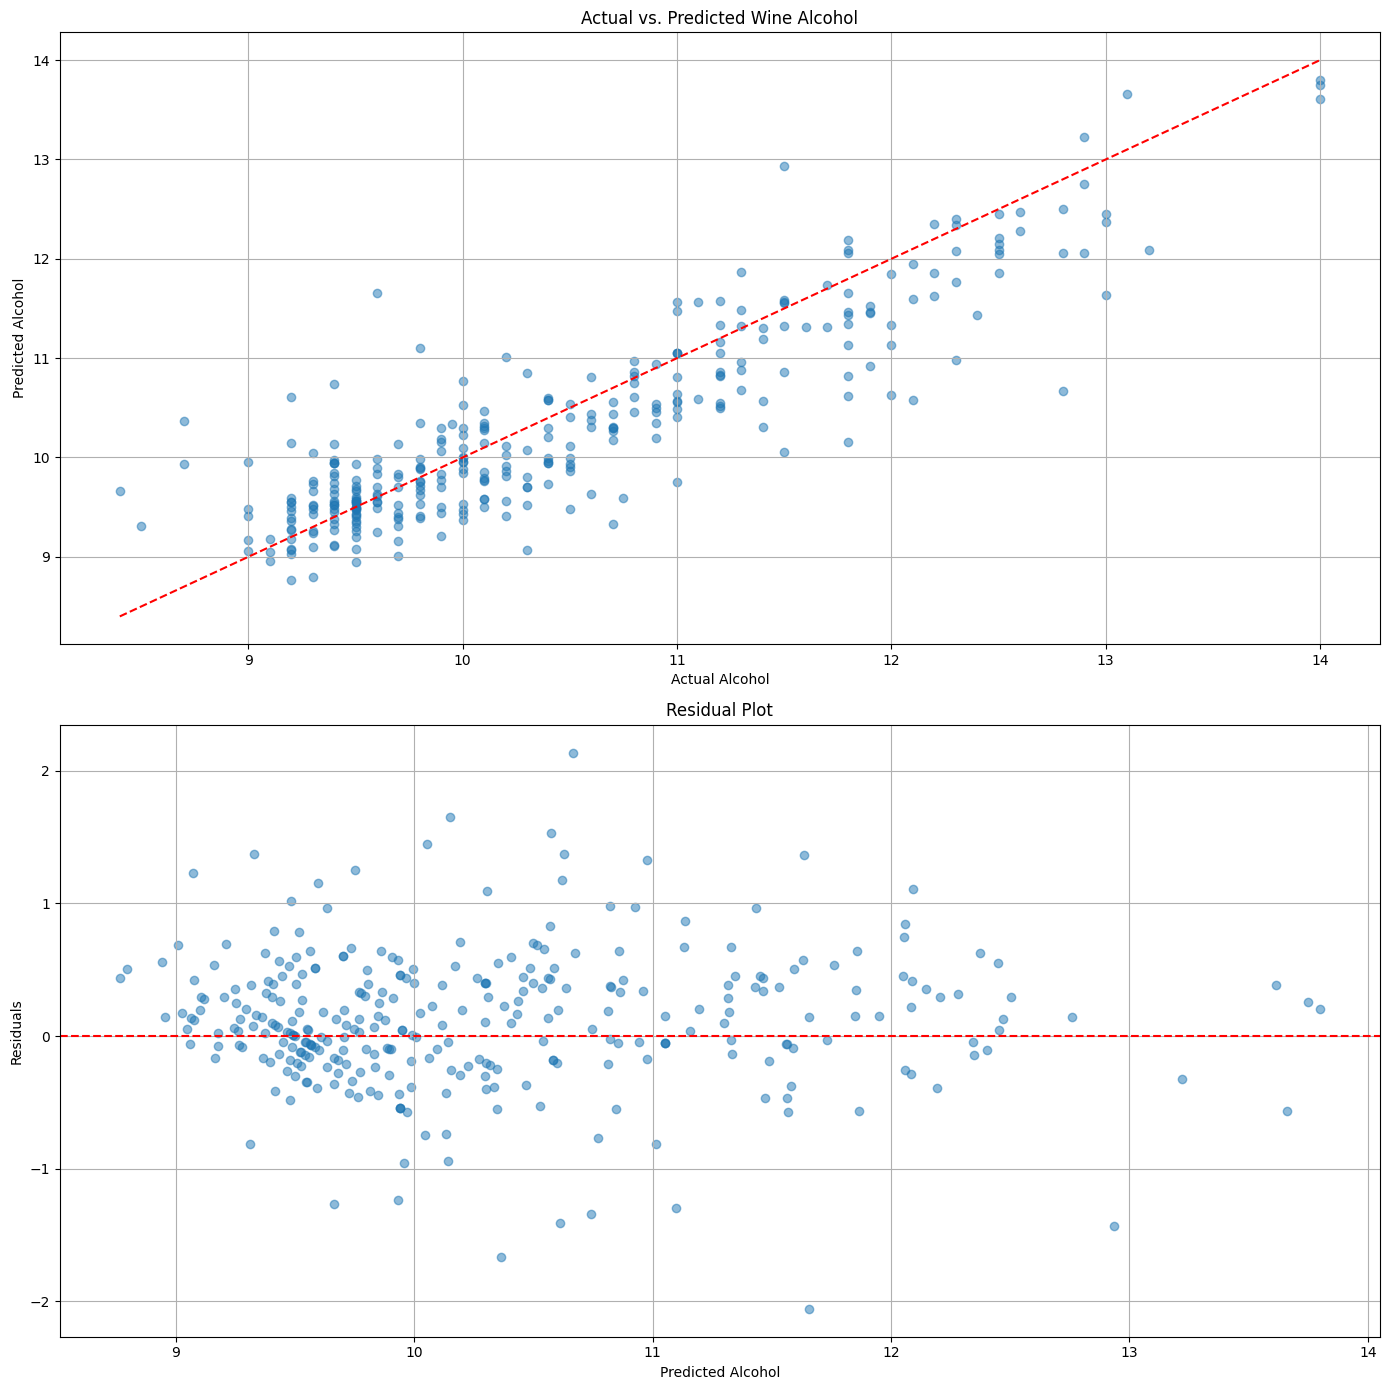

In [48]:
# Predict and Evaluate

# Make predictions
y_pred_wdl = wide_and_deep_model.predict([X_test_wide, X_test_deep]).flatten()

# Evaluate using your custom function
evaluate_model(y_test, y_pred_wdl, "Wide and Deep Learning (Regression)")

# Conclusions

In [49]:
%reset -f

import pandas as pd
from matplotlib import cm
from matplotlib.colors import Normalize, to_hex, rgb_to_hsv
import matplotlib.pyplot as plt

# 1. Data: example values for 7 models
data = {
    'Model': ['kNN', 'Random Forest', 'MLP', 'DNN', 'CNN', 'Tabnet', 'W&DL'],
    'R2':    [0.6627, 0.7830, 0.8216, 0.8227, 0.7682, 0.7023, 0.7749],
    'RMSE':  [0.6480, 0.5197, 0.4713, 0.4698, 0.5372, 0.6088, 0.5294],
    'MAE':   [0.4602, 0.3702, 0.3629, 0.3626, 0.4062, 0.4740, 0.3930],
    'MSE':   [0.4199, 0.2701, 0.2221, 0.2207, 0.2886, 0.3706, 0.2803],
    'Execution Time': ['5 seconds', '36 seconds', '≈ One hour', '≈ Several hours', '≈ Half an hour', '33 seconds', '40 seconds']
}
df = pd.DataFrame(data)

# 2. Colormaps
cmap = cm.get_cmap('YlGnBu') # You can change the colormap if you prefer

# Normalizers
r2_norm   = Normalize(vmin=df['R2'].min(), vmax=df['R2'].max())
rmse_norm = Normalize(vmin=df['RMSE'].min(), vmax=df['RMSE'].max())
mae_norm  = Normalize(vmin=df['MAE'].min(), vmax=df['MAE'].max())
mse_norm  = Normalize(vmin=df['MSE'].min(), vmax=df['MSE'].max())

exec_order = ['Few seconds', 'Few minutes', 'One hour', 'Several hours']
exec_norm = Normalize(vmin=0, vmax=len(exec_order) - 1)


# 3. Text contrast function
def get_text_color_from_rgb(rgb):
    hsv = rgb_to_hsv(rgb[:3])
    return 'black' if hsv[2] > 0.6 else 'white'

# 4. Metric color functions - Inverted for R2, RMSE, MAE, MSE
def color_r2(val):
    norm_val = 1 - r2_norm(val)  # higher is better, but we want light color for high values
    rgb = cmap(norm_val)
    color = to_hex(rgb)
    text_color = get_text_color_from_rgb(rgb)
    return f'background-color: {color}; color: {text_color}'

def color_rmse(val):
    norm_val = rmse_norm(val)  # lower is better, we want light color for high values (which are bad)
    rgb = cmap(norm_val)
    color = to_hex(rgb)
    text_color = get_text_color_from_rgb(rgb)
    return f'background-color: {color}; color: {text_color}'

def color_mae(val):
    norm_val = mae_norm(val)  # lower is better, we want light color for high values (which are bad)
    rgb = cmap(norm_val)
    color = to_hex(rgb)
    text_color = get_text_color_from_rgb(rgb)
    return f'background-color: {color}; color: {text_color}'

def color_mse(val):
    norm_val = mse_norm(val)  # lower is better, we want light color for high values (which are bad)
    rgb = cmap(norm_val)
    color = to_hex(rgb)
    text_color = get_text_color_from_rgb(rgb)
    return f'background-color: {color}; color: {text_color}'


# 5. Execution Time coloring
def color_execution_time(val):
    mapped_val = None
    if 'seconds' in val:
        if val in ['5 seconds', '36 seconds']:
            mapped_val = 'Few seconds'
        elif val == '54 seconds':
            mapped_val = 'Few minutes'
        else:
            mapped_val = 'Few seconds' # Default for other second values
    elif 'minutes' in val:
        mapped_val = 'Few minutes'
    elif 'One hour' in val:
        mapped_val = 'One hour'
    elif 'Several hours' in val:
        mapped_val = 'Several hours'

    if mapped_val in exec_order:
        idx = exec_order.index(mapped_val)
        # Invert norm for execution time if you want light color for longer times
        norm_val = exec_norm(idx) # Keep as is for dark color for longer times
        rgb = cmap(norm_val)
        color = to_hex(rgb)
        text_color = get_text_color_from_rgb(rgb)
        return f'background-color: {color}; color: {text_color}'
    return ''

# 6. Style the table
def style_table(df):
    return (
        df.style
        .applymap(color_r2, subset=['R2'])
        .applymap(color_rmse, subset=['RMSE'])
        .applymap(color_mae, subset=['MAE'])
        .applymap(color_mse, subset=['MSE'])
        .applymap(color_execution_time, subset=['Execution Time'])
        .format({'R2': '{:.4f}', 'RMSE': '{:.4f}', 'MAE': '{:.4f}', 'MSE': '{:.4f}'})
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('text-align', 'center'), ('font-size', '14pt')]},
            {'selector': 'td', 'props': [('font-size', '14pt'), ('padding', '10px 15px')]},
        ])
        .hide(axis='index')
    )

style_table(df)

/tmp/ipython-input-3778972886.py:20: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

/tmp/ipython-input-3778972886.py:98: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.

/tmp/ipython-input-3778972886.py:99: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.

/tmp/ipython-input-3778972886.py:100: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.

/tmp/ipython-input-3778972886.py:101: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.

/tmp/ipython-input-3778972886.py:102: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



Model,R2,RMSE,MAE,MSE,Execution Time
kNN,0.6627,0.6480,0.4602,0.4199,5 seconds
Random Forest,0.7830,0.5197,0.3702,0.2701,36 seconds
MLP,0.8216,0.4713,0.3629,0.2221,≈ One hour
DNN,0.8227,0.4698,0.3626,0.2207,≈ Several hours
CNN,0.7682,0.5372,0.4062,0.2886,≈ Half an hour
Tabnet,0.7023,0.6088,0.4740,0.3706,33 seconds
W&DL,0.7749,0.5294,0.3930,0.2803,40 seconds
